In [1]:
data = open('input.txt').read().split('\n')

In [2]:
coords = [[int(y) for y in x.strip().split(",")]for line in data for x in line.split("->")]

In [11]:
import numpy as np
import matplotlib.pyplot as plt
coords = np.array(coords)

In [12]:
coords[:,0].min(),coords[:,0].max(),coords[:,1].min(),coords[:,1].max()

(462, 534, 13, 171)

In [13]:
def draw(instrs, m):
    i=0
    while i<len(instrs)-3:
        y1,x1= instrs[i],instrs[i+1]
        y2,x2 = instrs[i+2],instrs[i+3]
#         print("p1",x1,y1)
#         print("p2",x2,y2)
        m[min(x1,x2):max(x2,x1)+1, min(y1,y2):max(y1,y2)+1] = 1
        i+=2
    return m
    

In [19]:
m = np.zeros((coords[:,1].max()+300, coords[:,0].max()+300))

In [20]:
for line in data:
    instrs = [int(y) for x in line.split("->")for y in x.strip().split(",") ]
    m = draw(instrs,m)


In [21]:
m[coords[:,1].max()+2,:] =1

In [22]:
def nextPosition(x,y):
#     print(x,y)
    if x+1>=len(m):
        return False
    if m[x+1,y] == 0:
        return nextPosition(x+1,y)
    else:
#         print("HERE")
        if m[x+1,y-1]==0:
            return nextPosition(x+1,y-1)
        elif m[x+1, y+1]==0:
            return nextPosition(x+1,y+1)
        else:
            return (x,y)

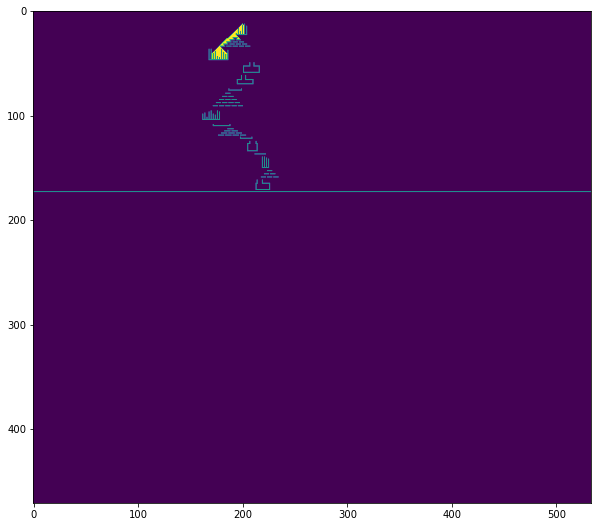

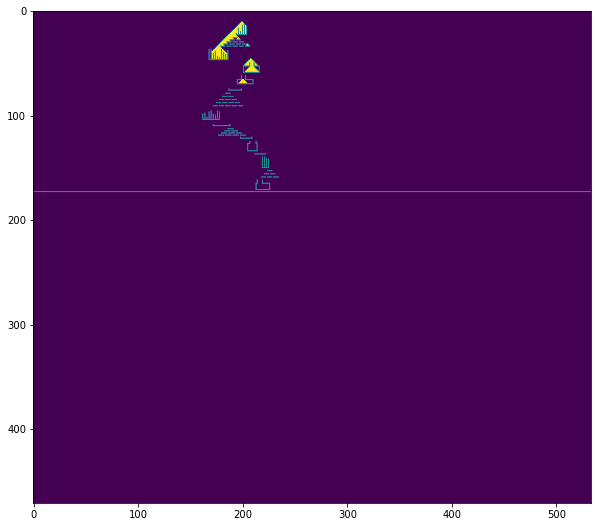

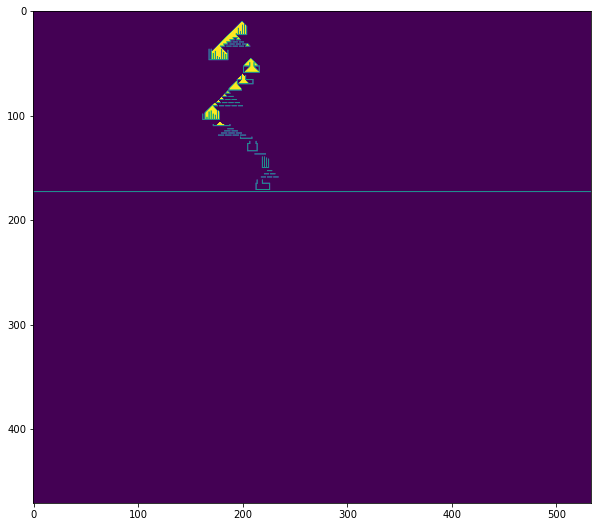

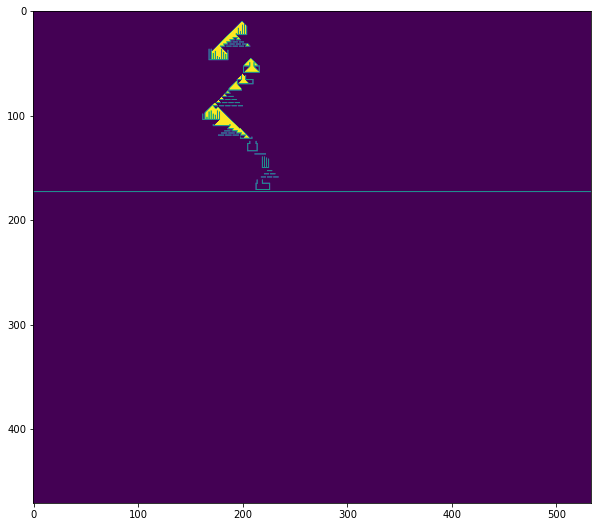

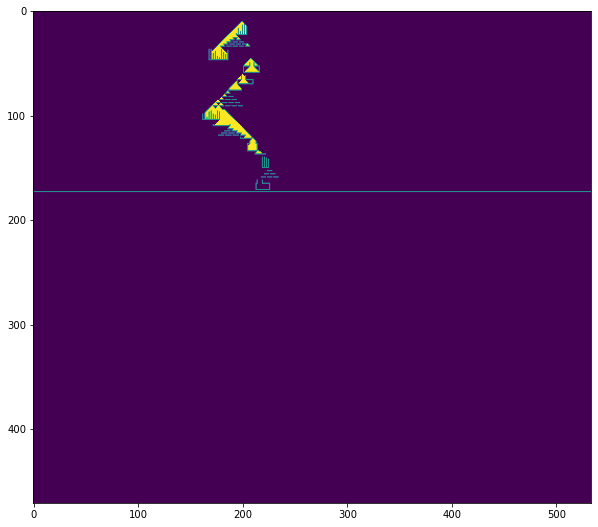

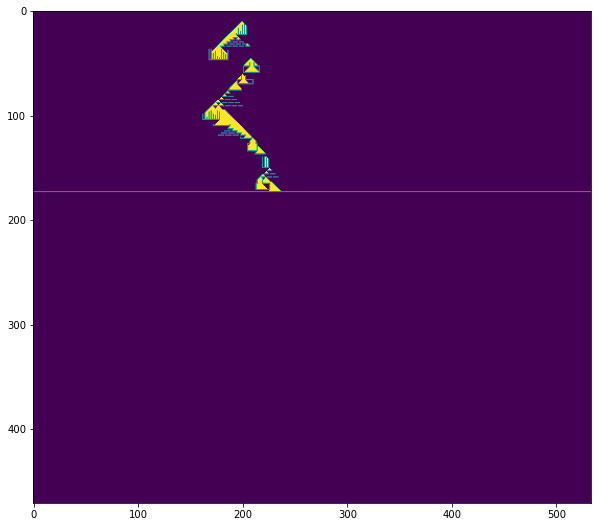

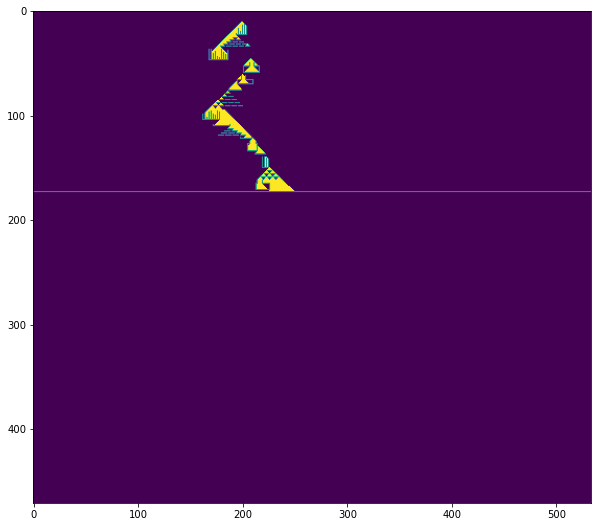

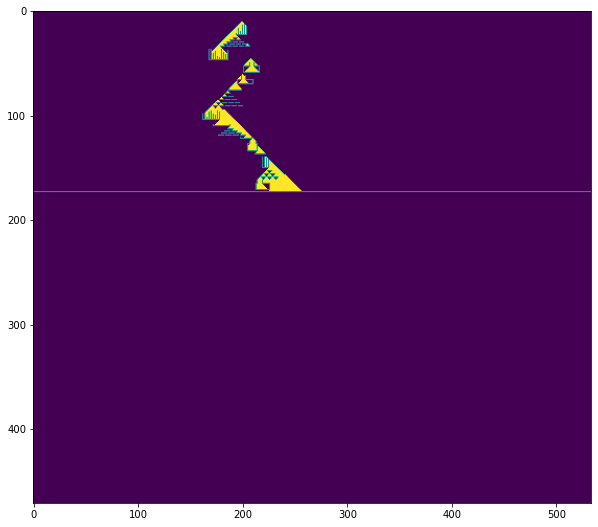

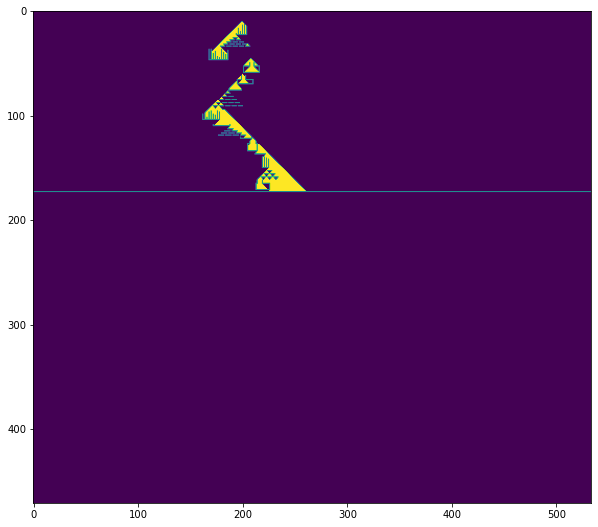

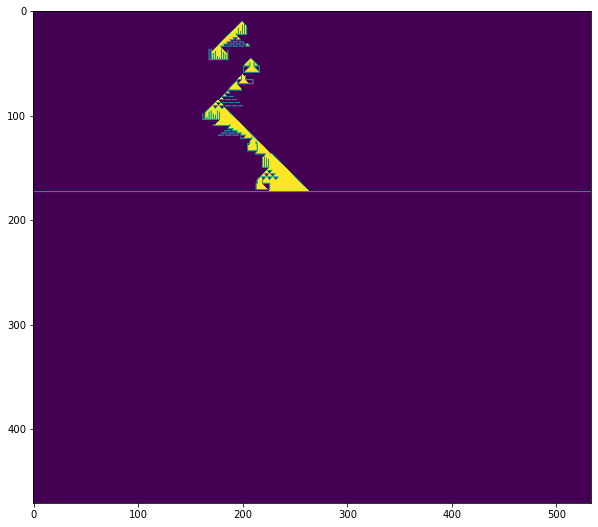

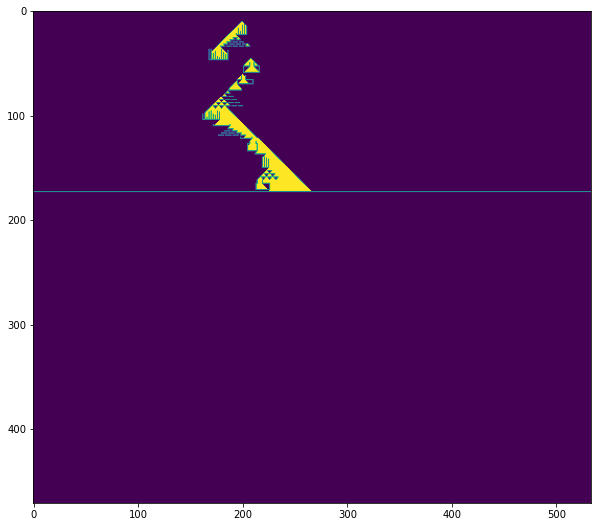

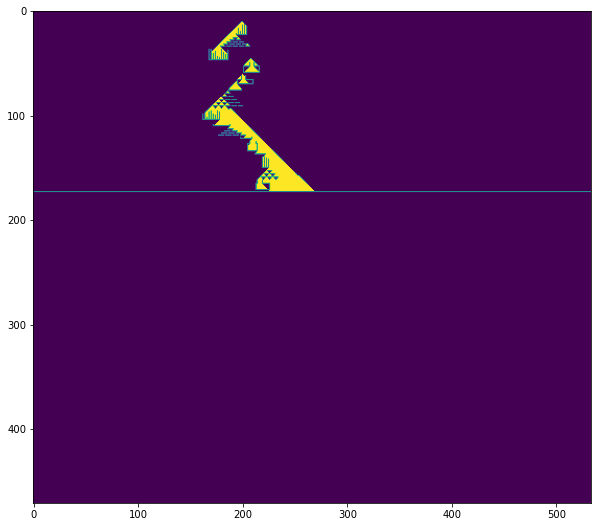

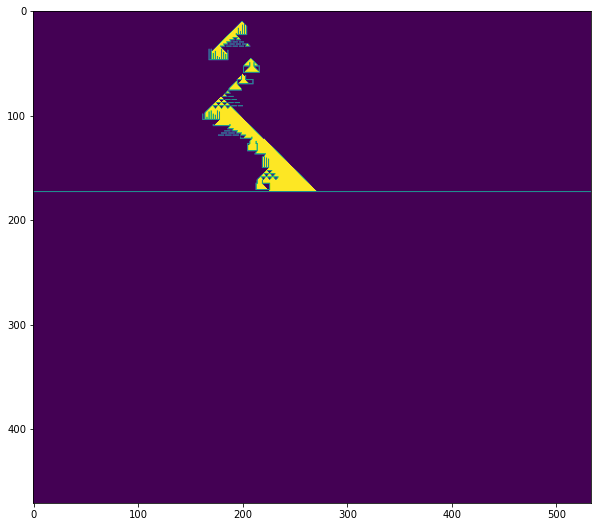

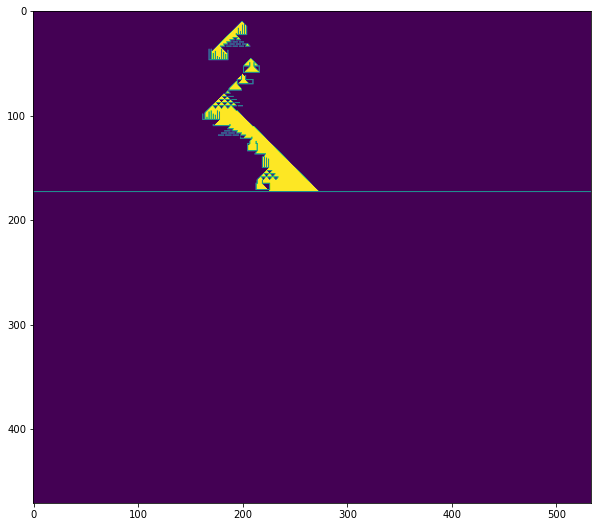

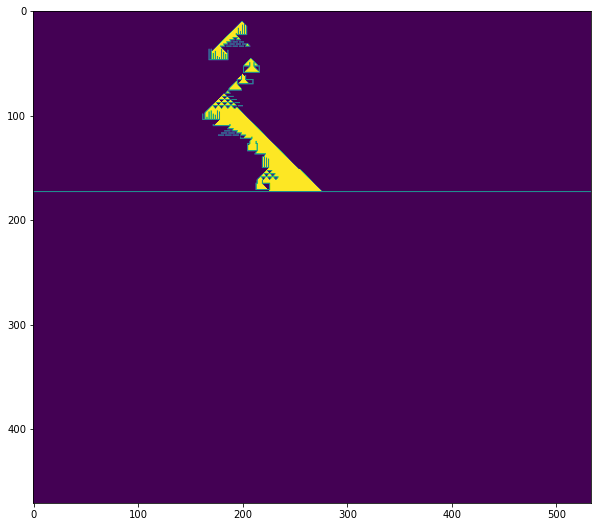

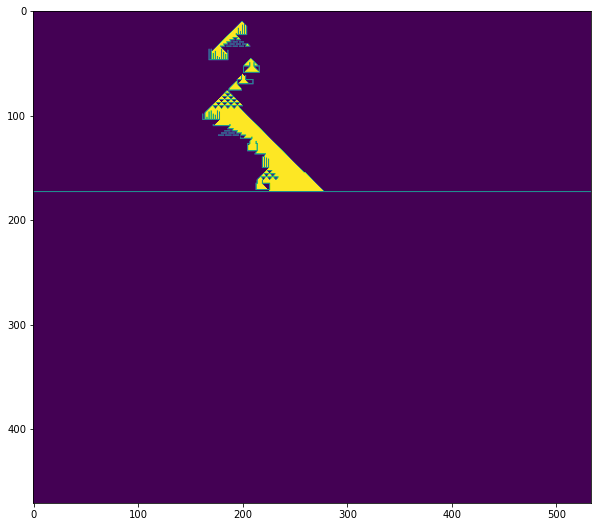

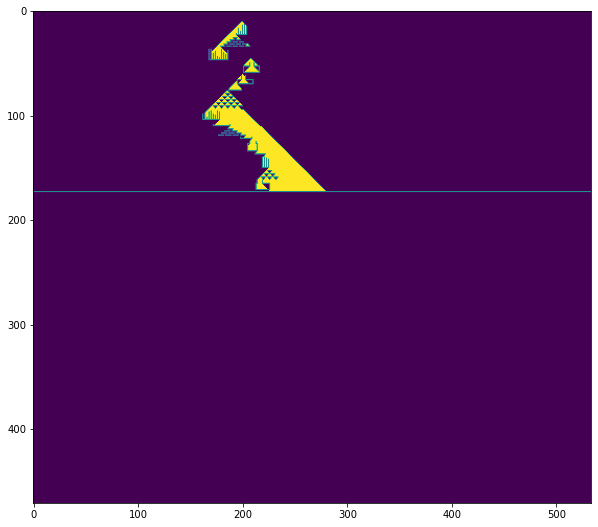

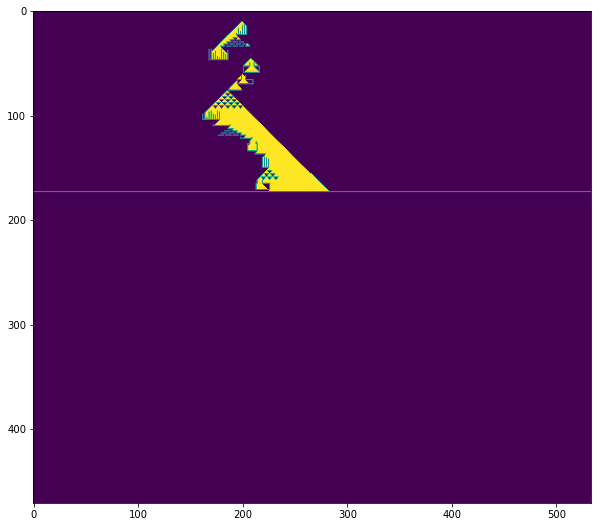

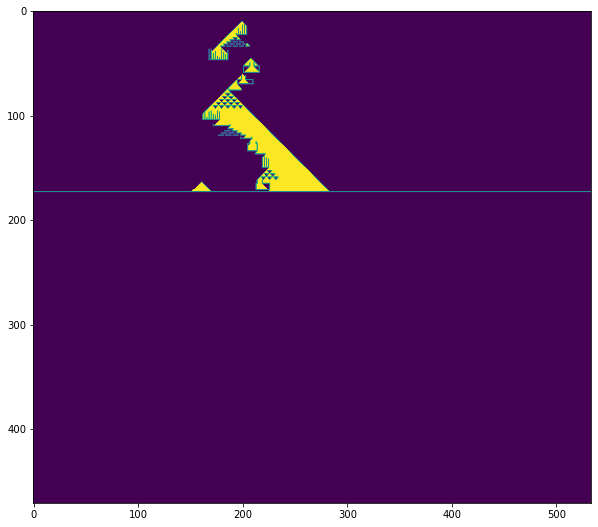

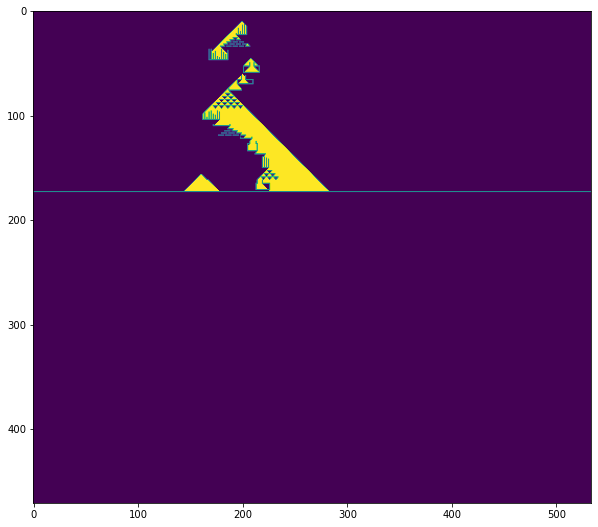

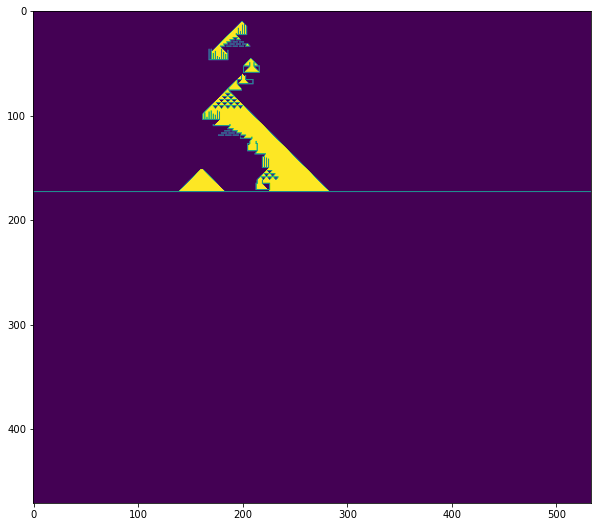

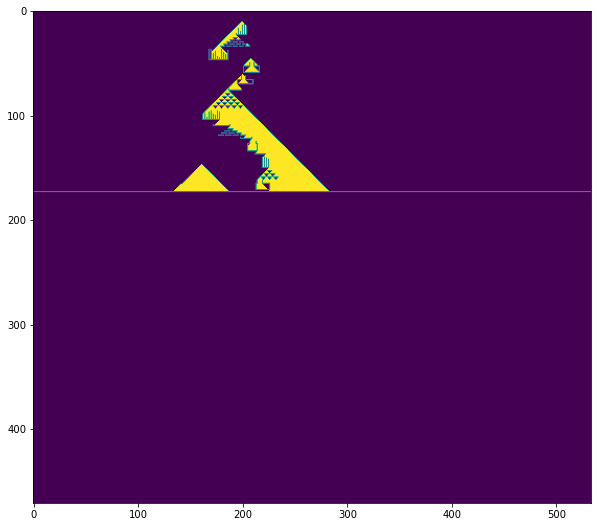

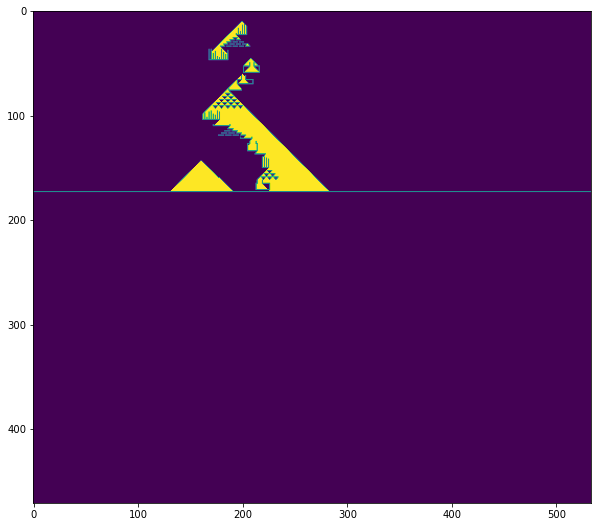

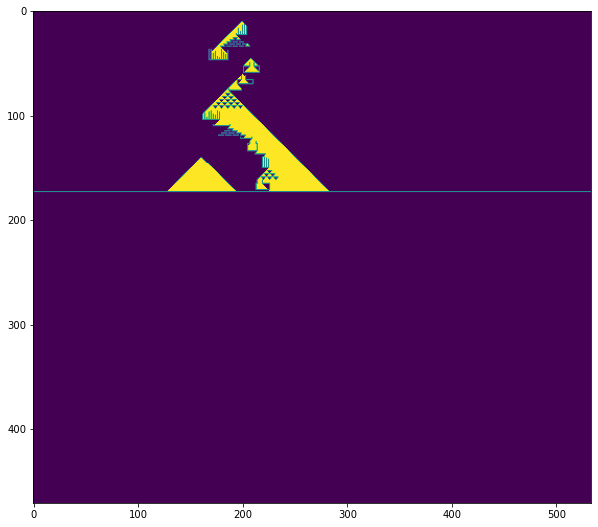

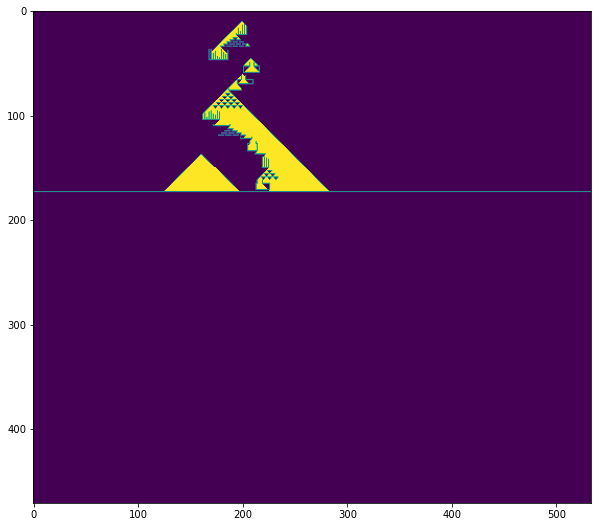

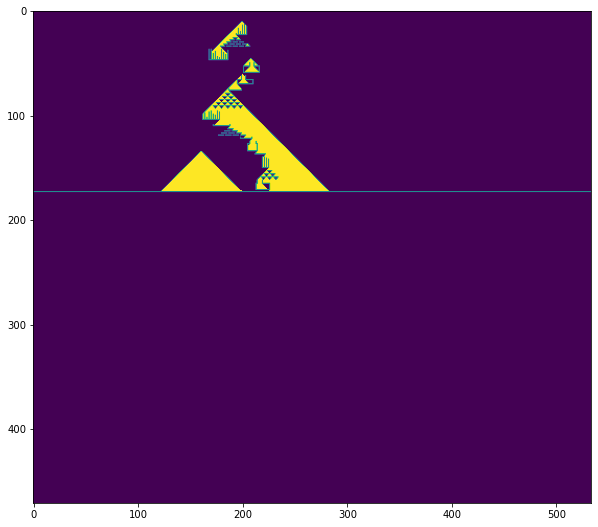

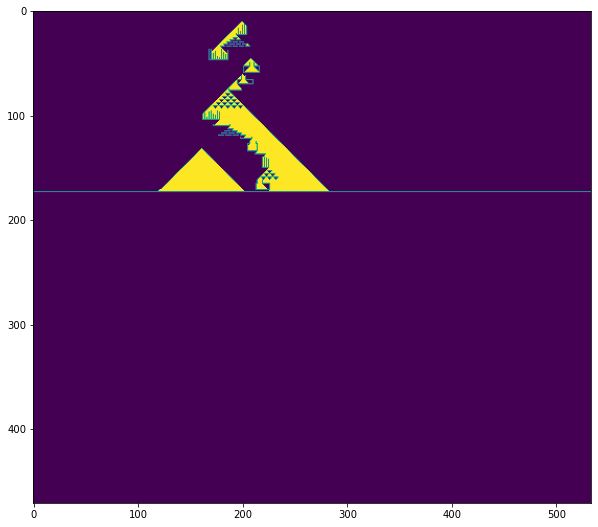

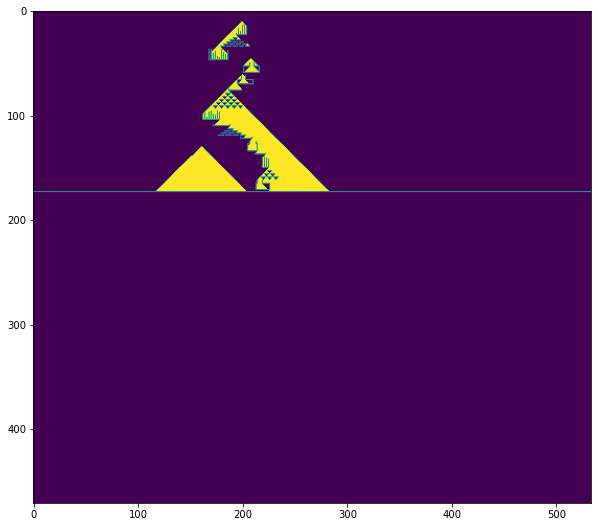

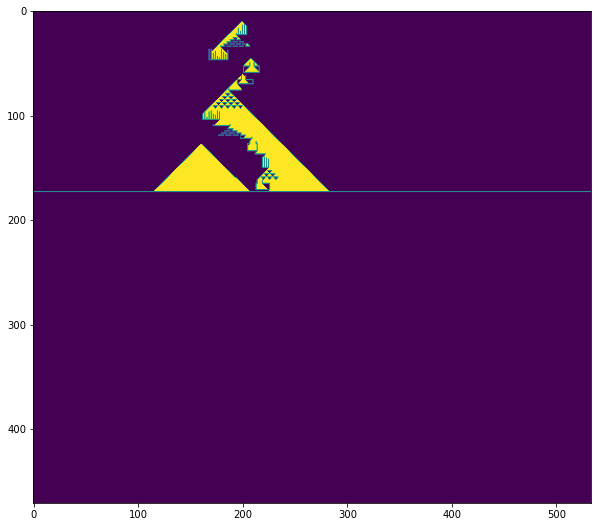

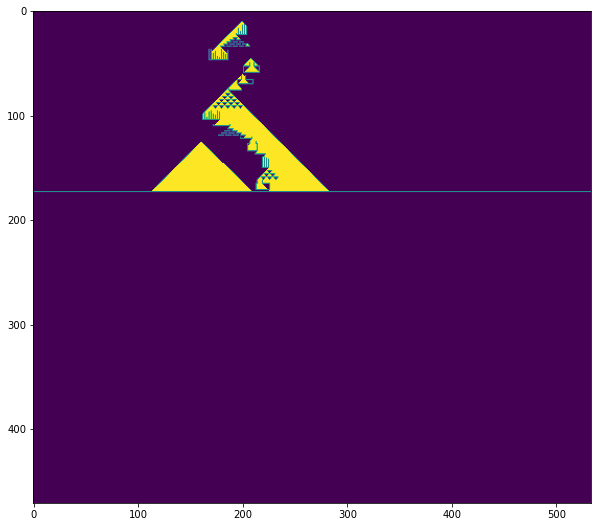

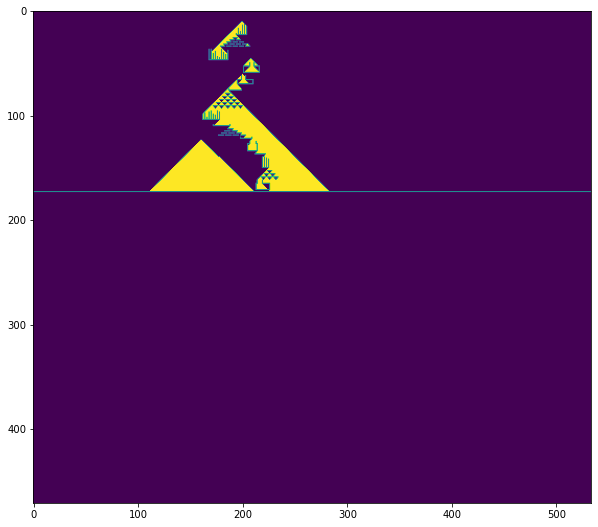

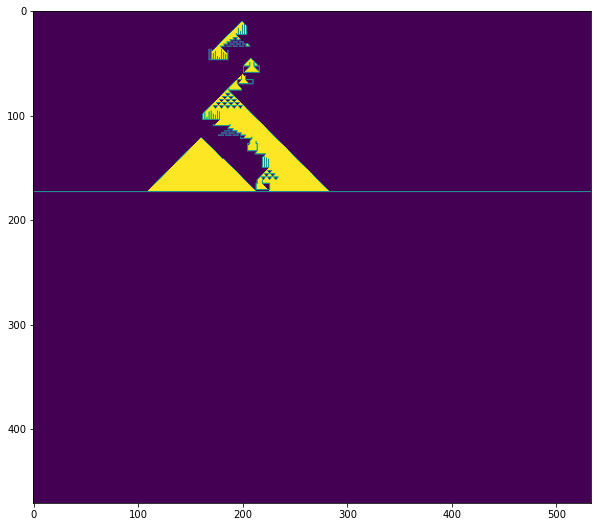

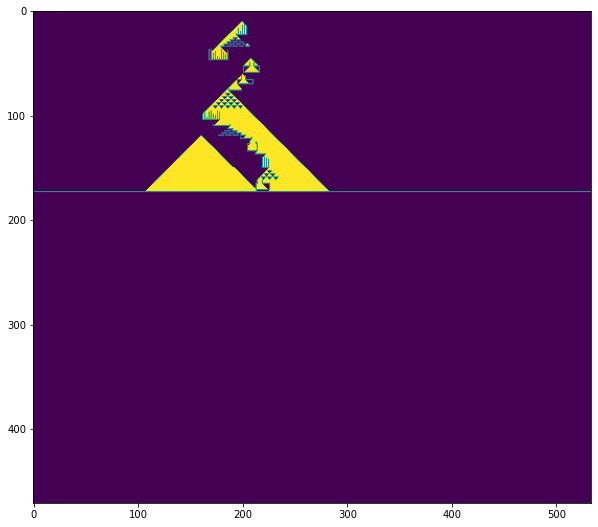

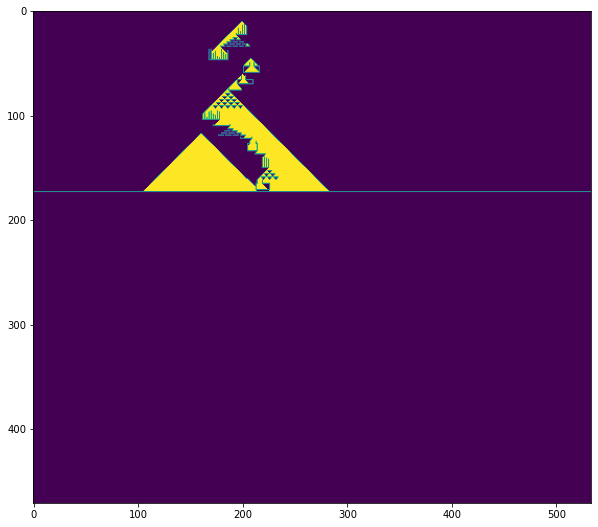

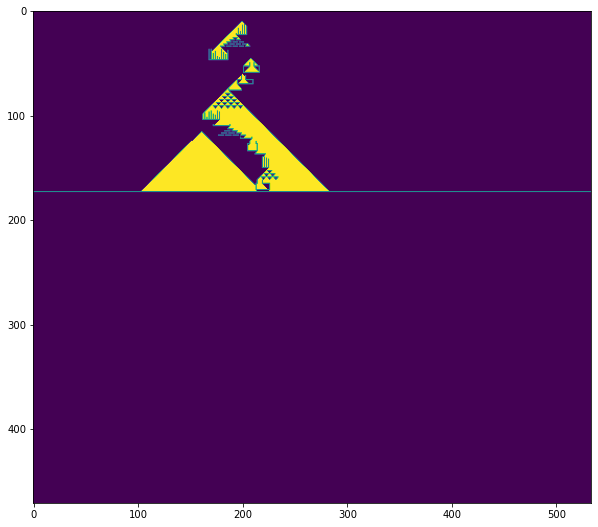

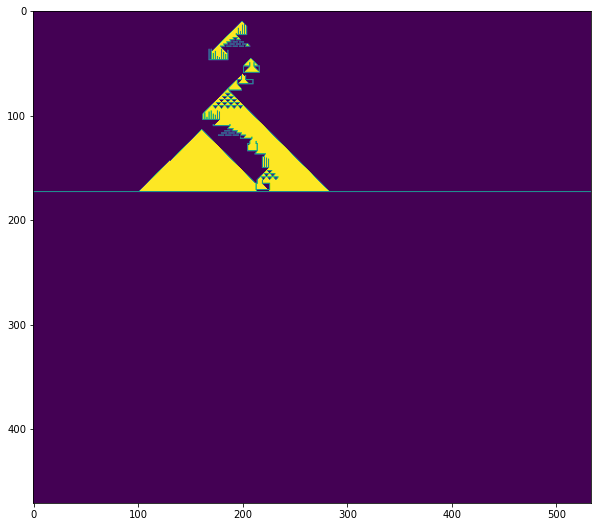

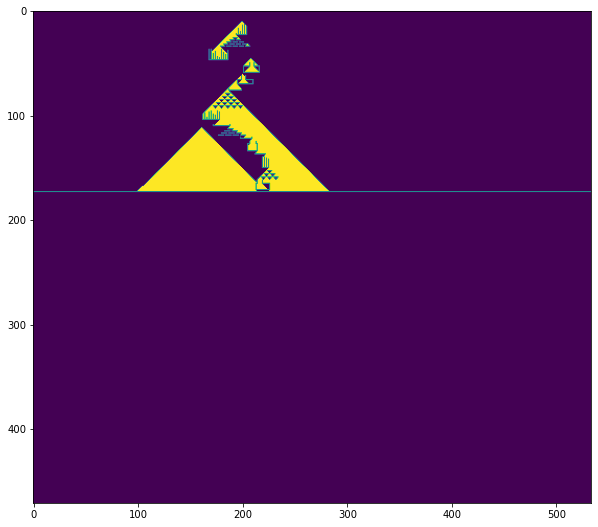

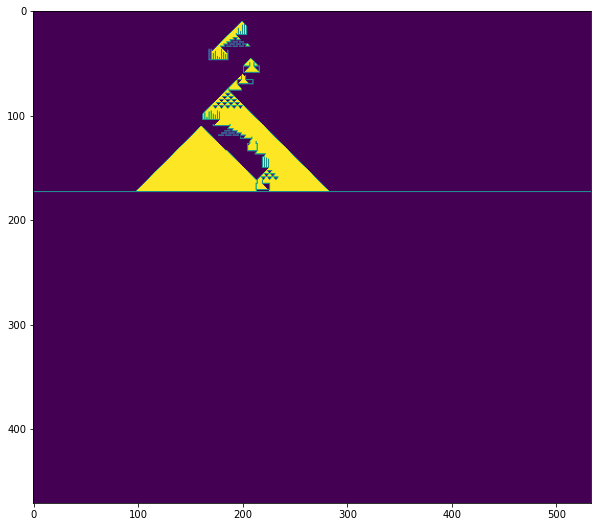

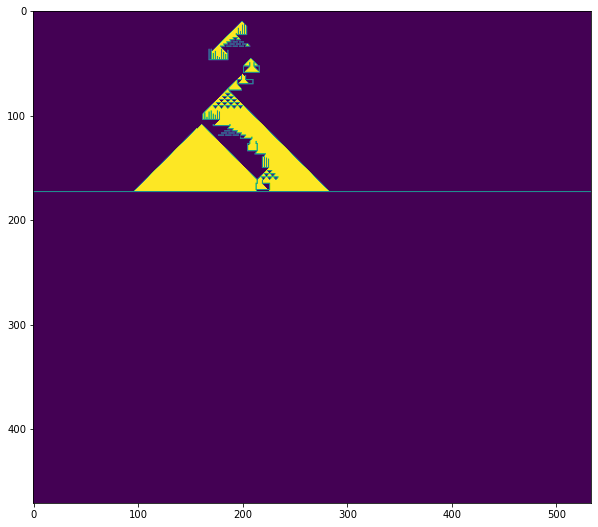

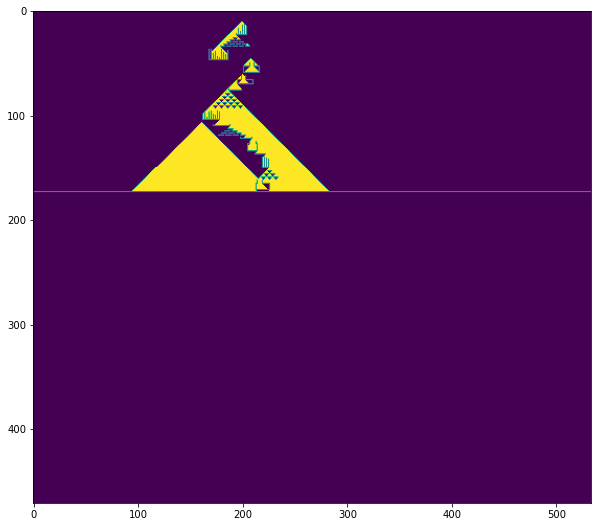

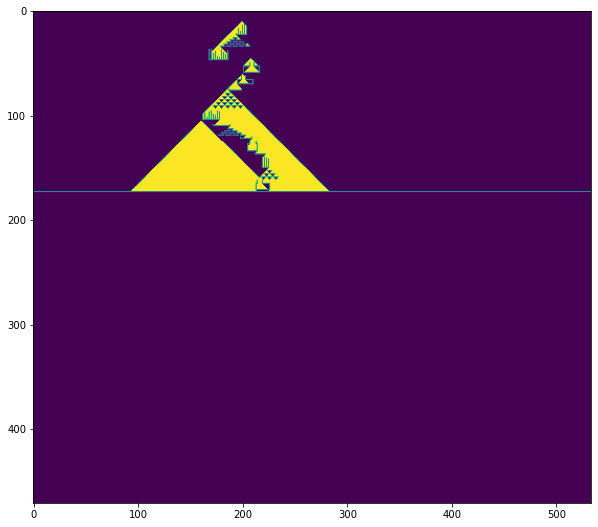

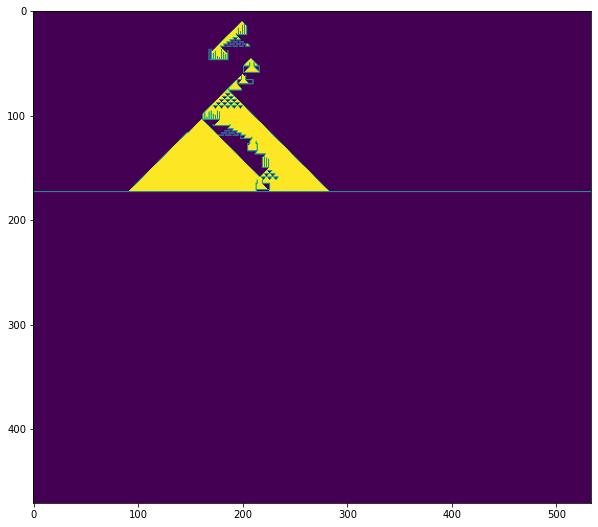

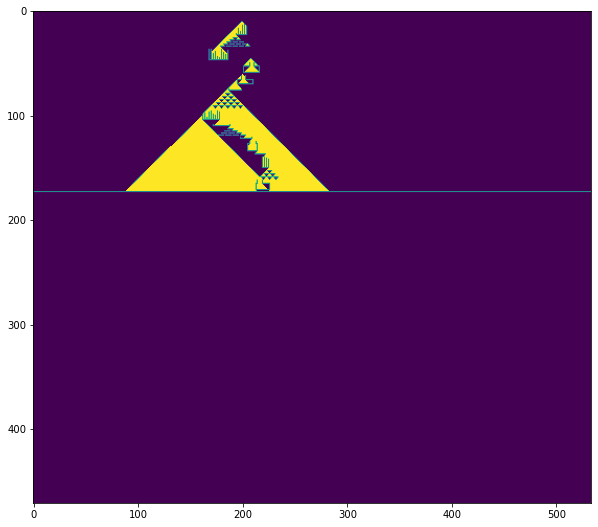

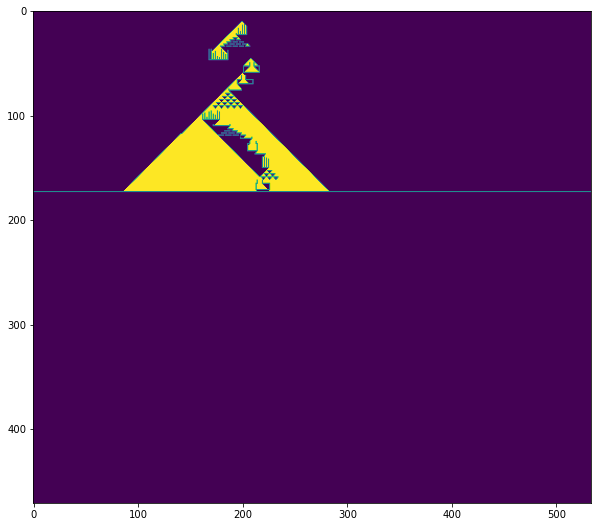

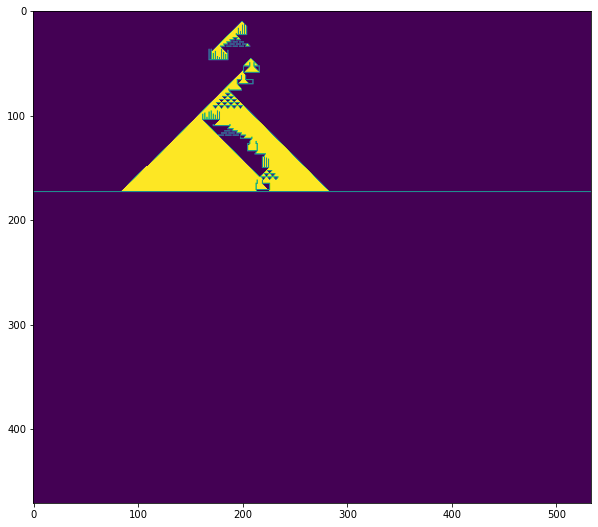

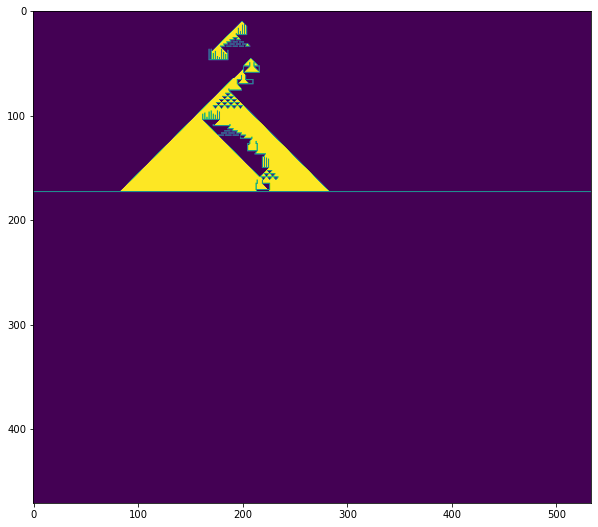

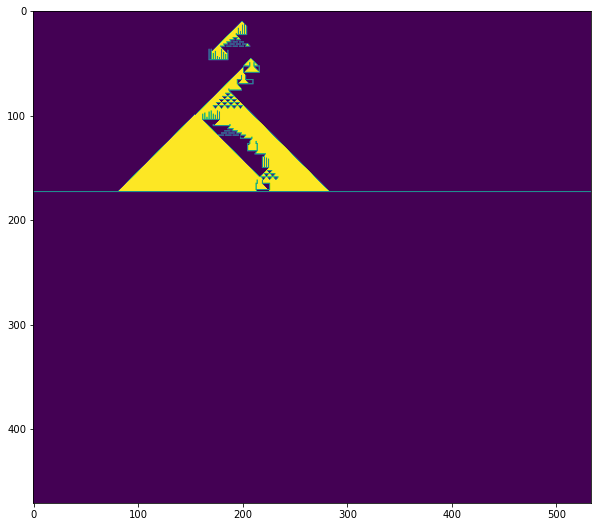

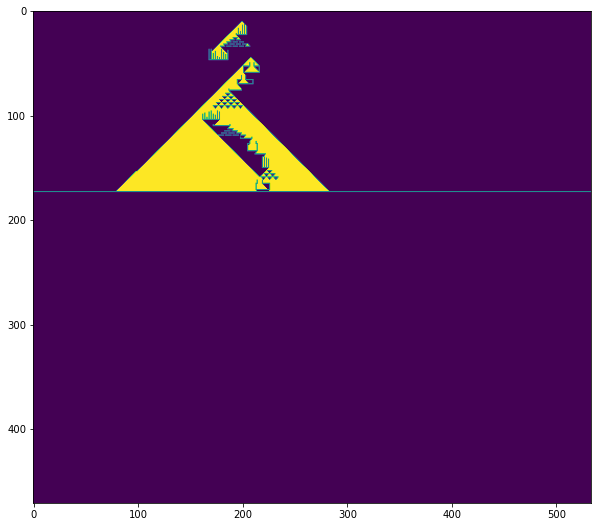

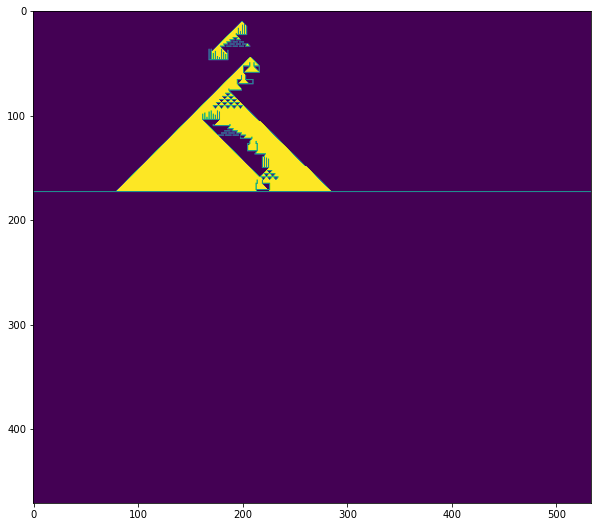

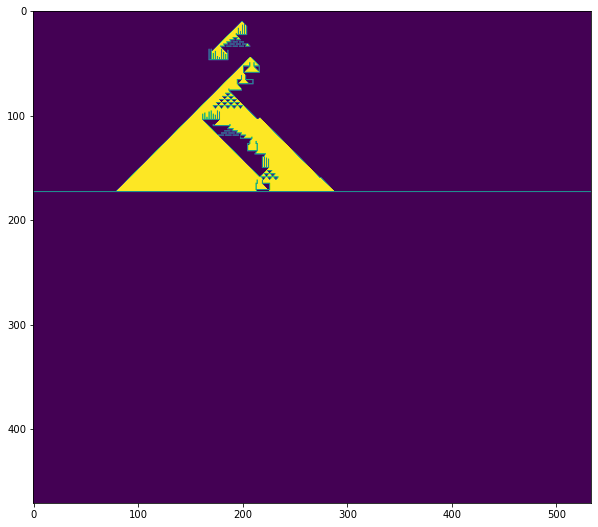

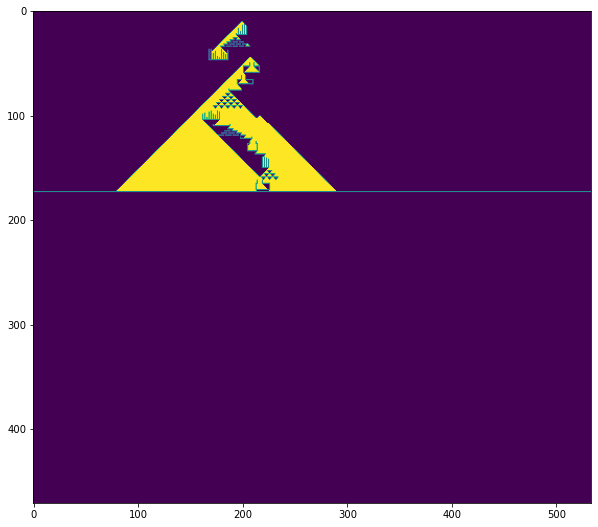

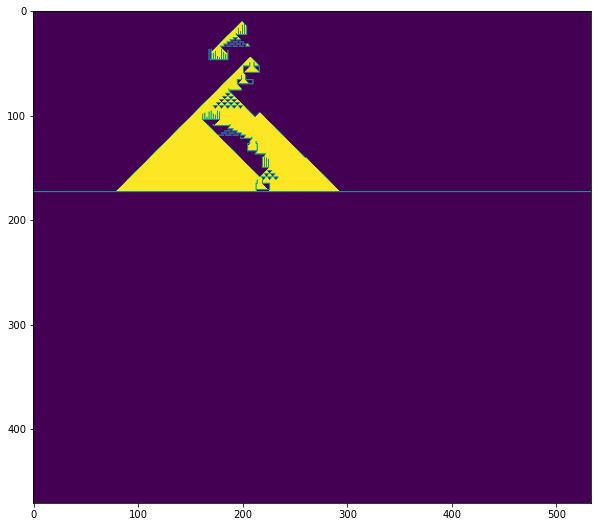

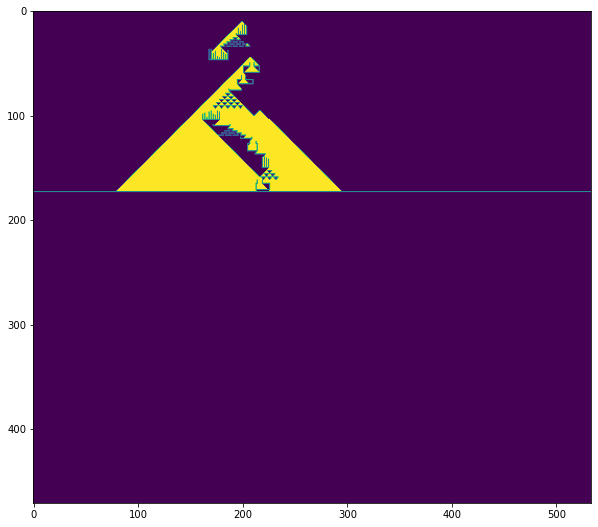

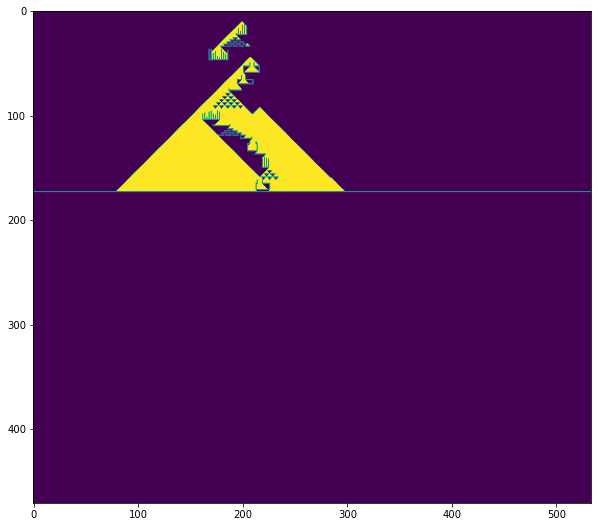

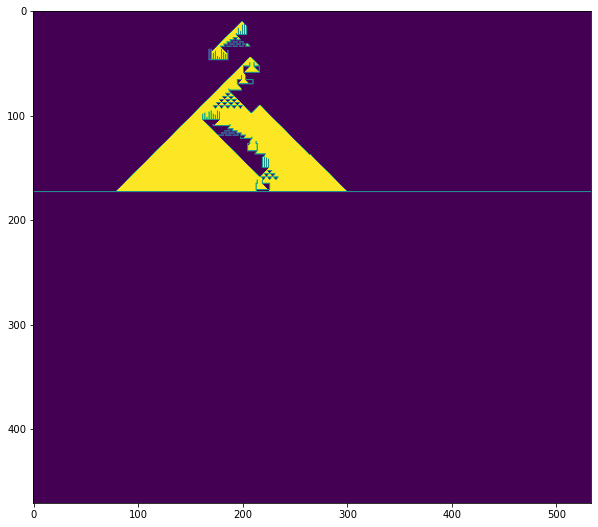

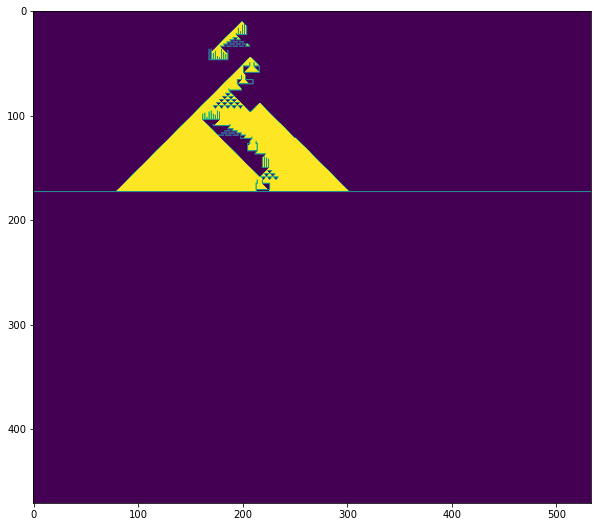

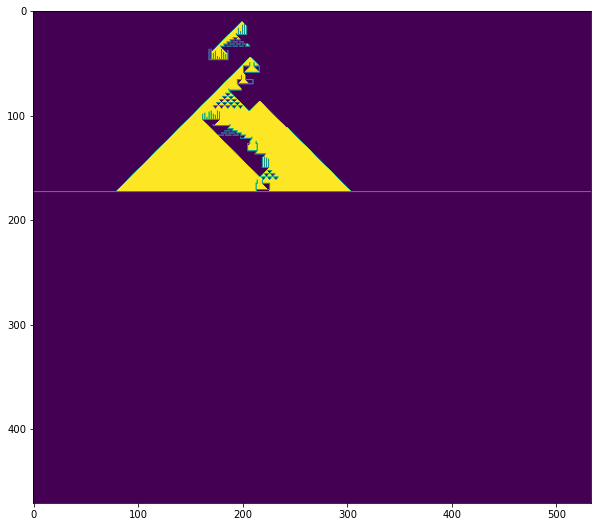

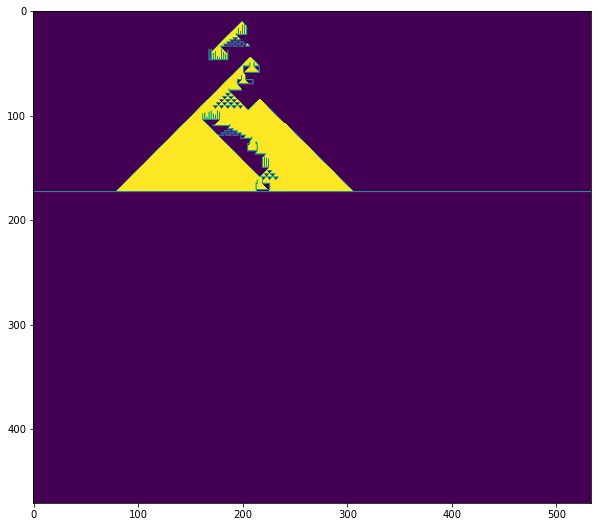

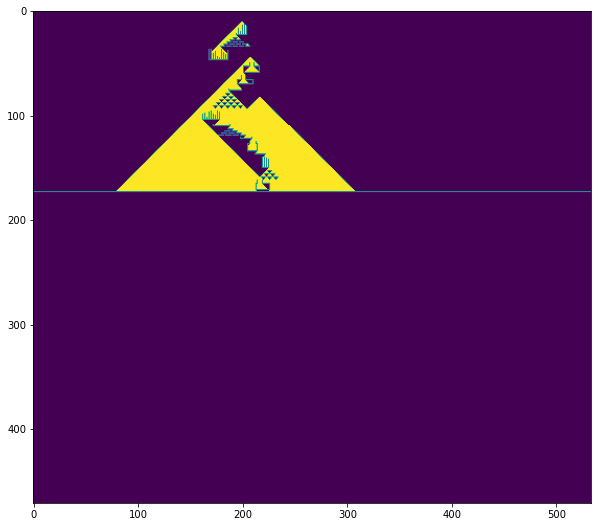

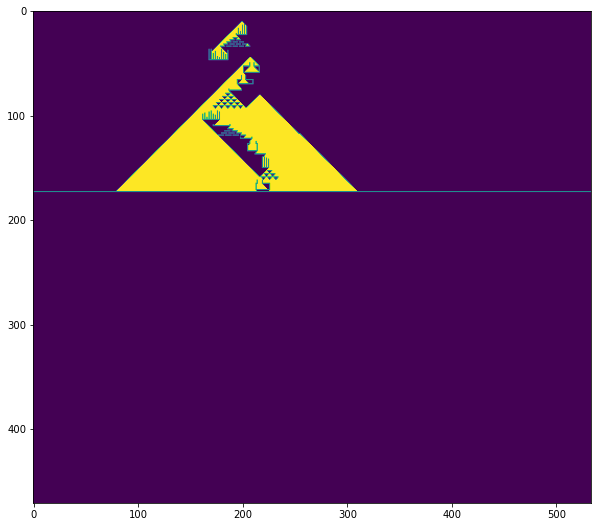

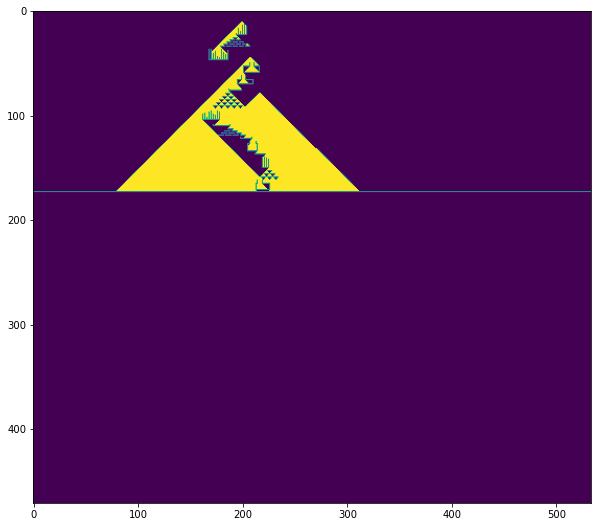

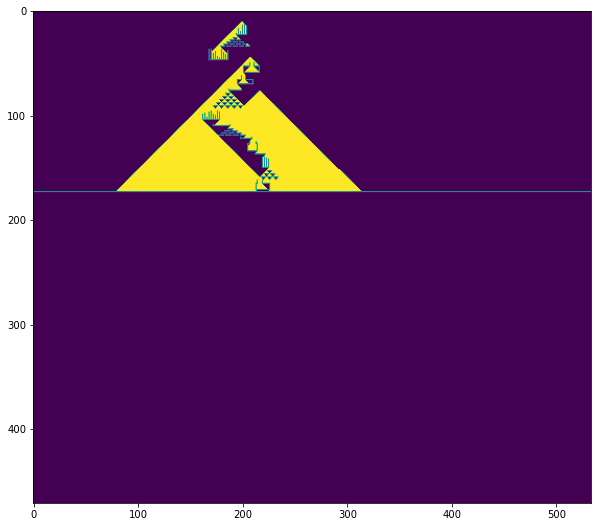

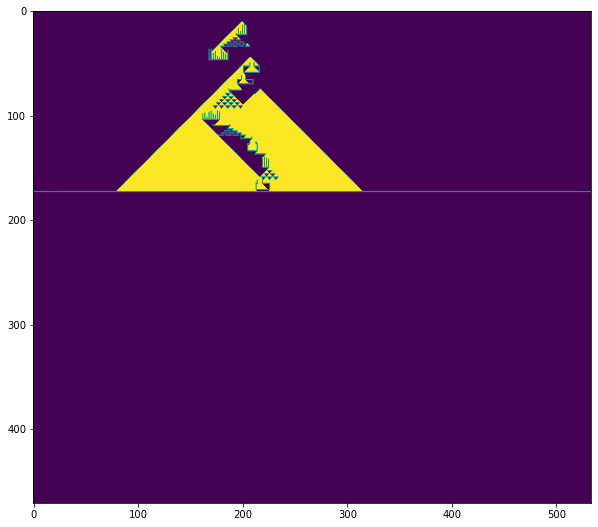

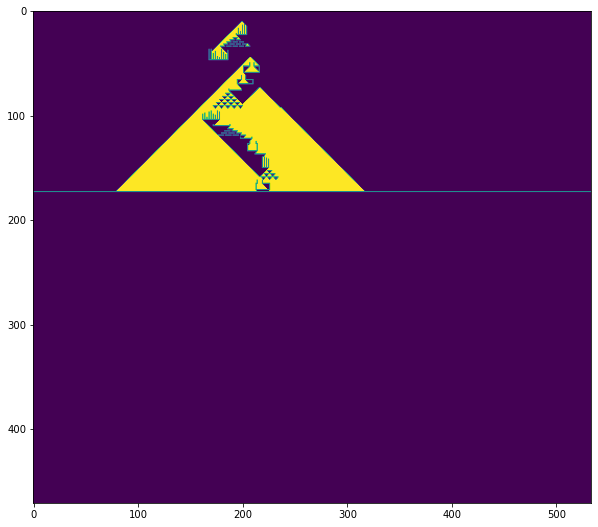

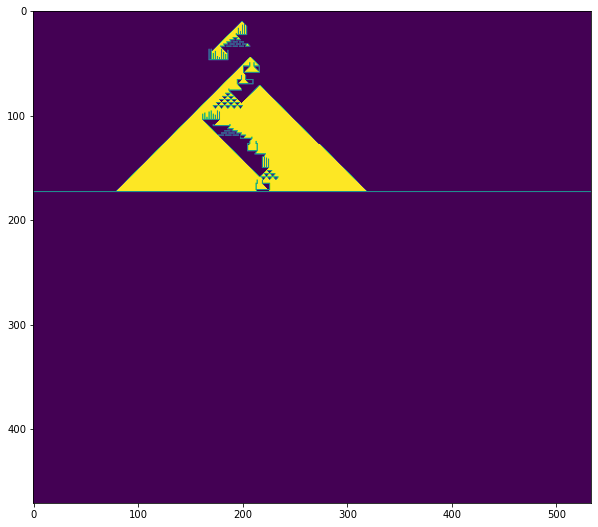

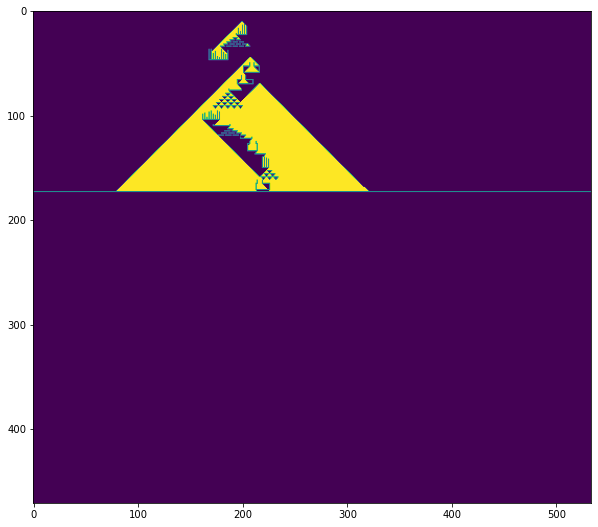

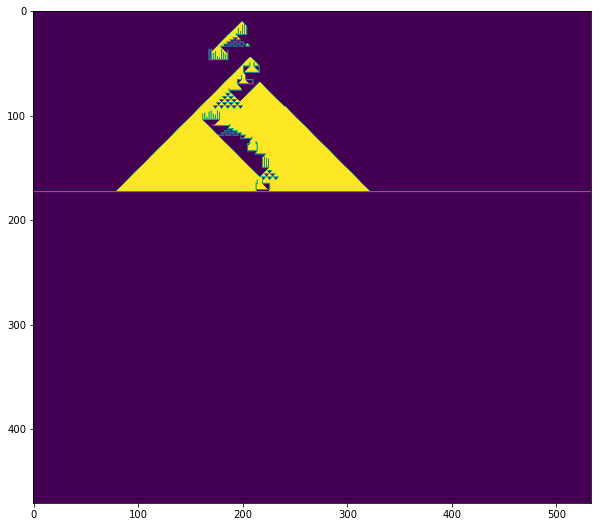

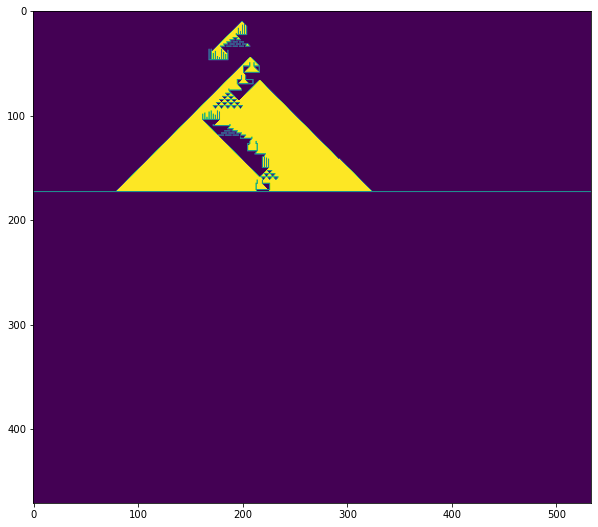

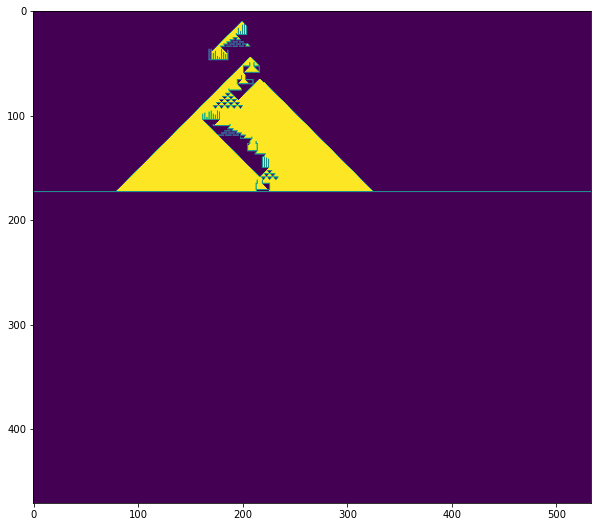

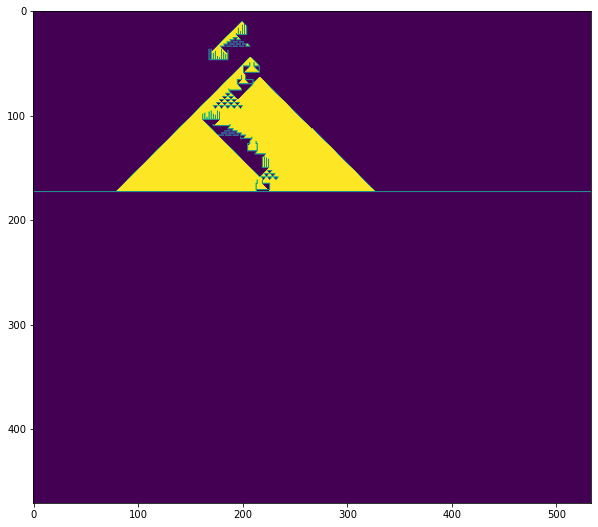

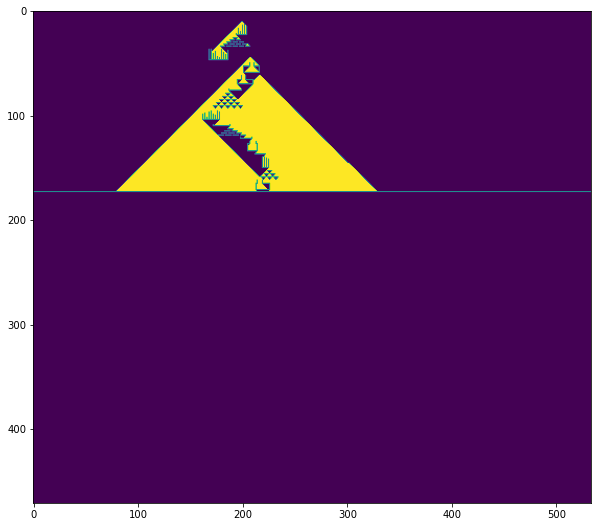

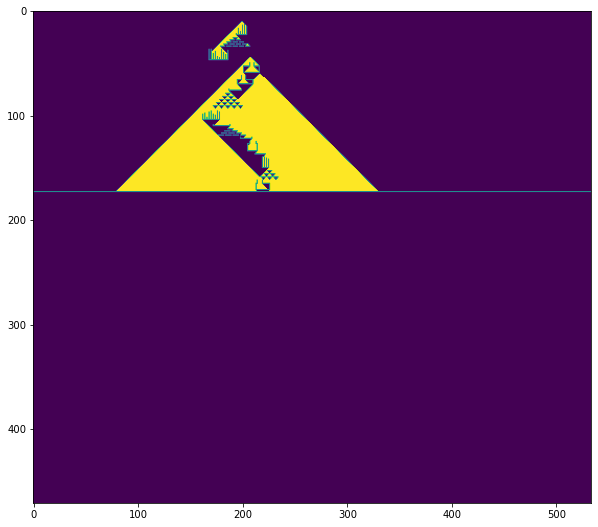

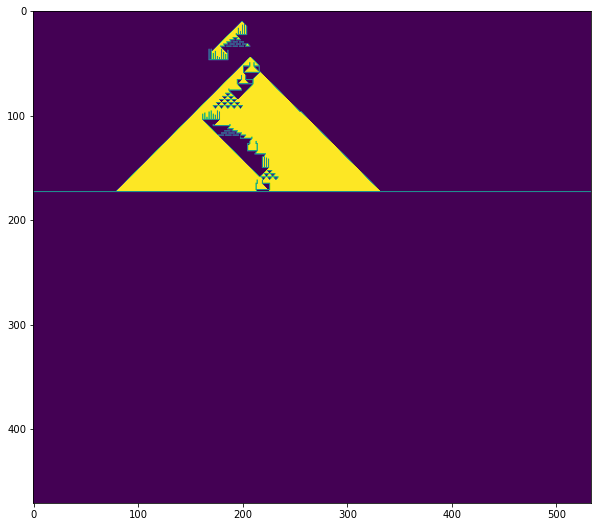

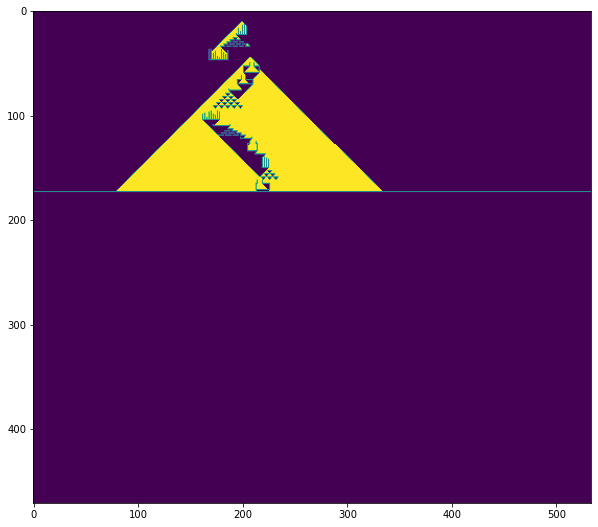

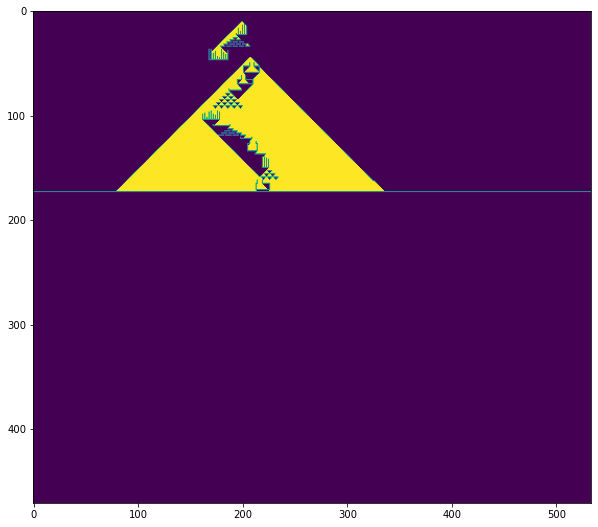

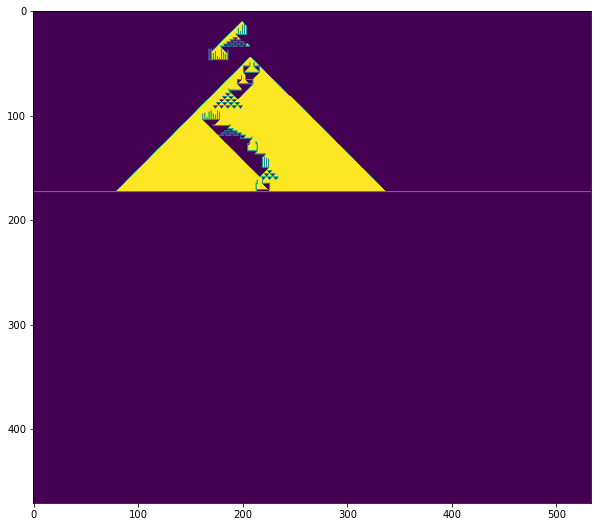

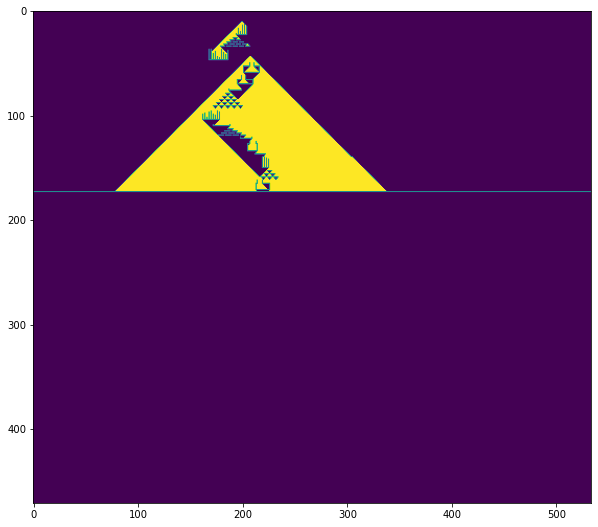

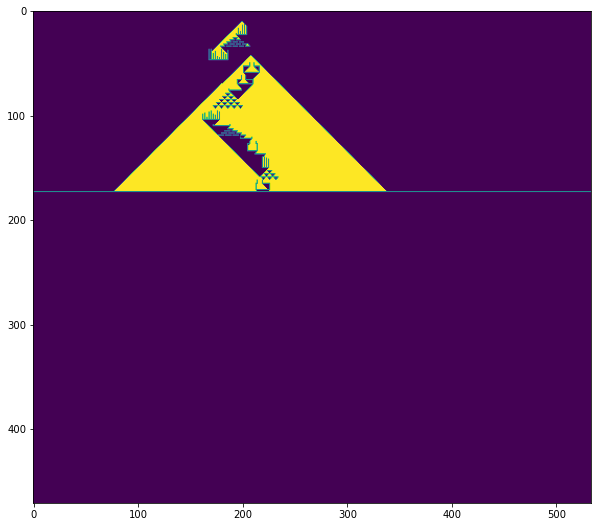

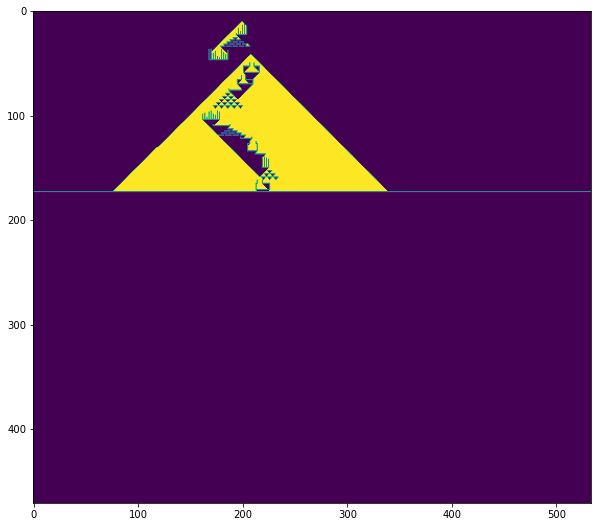

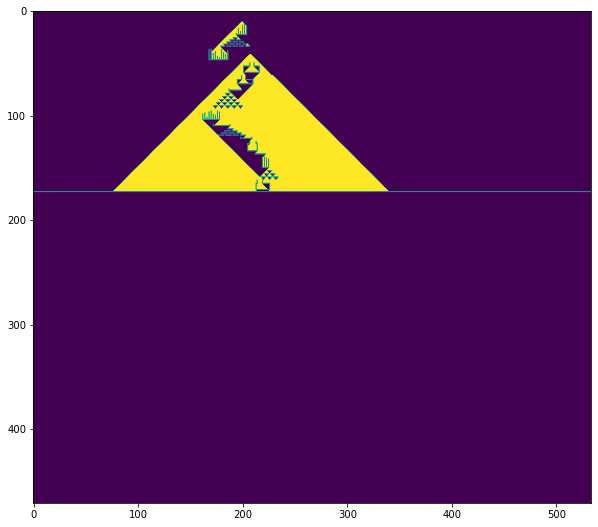

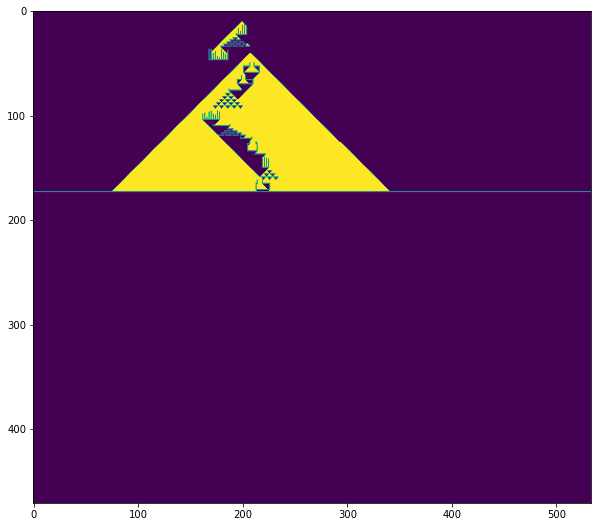

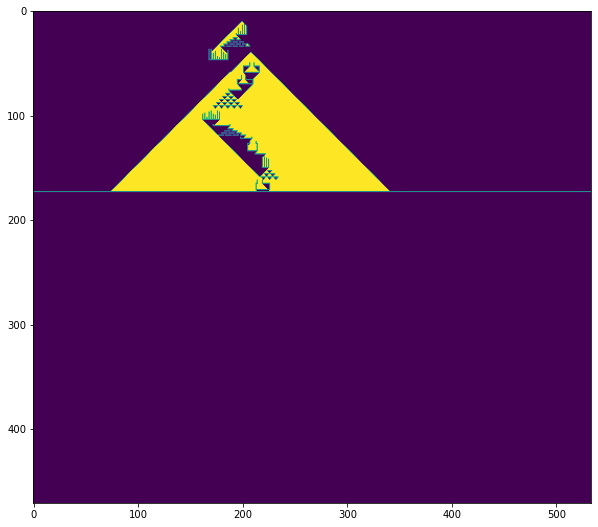

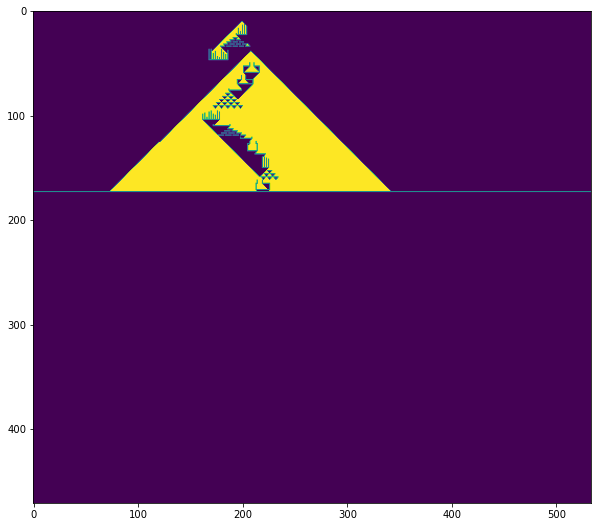

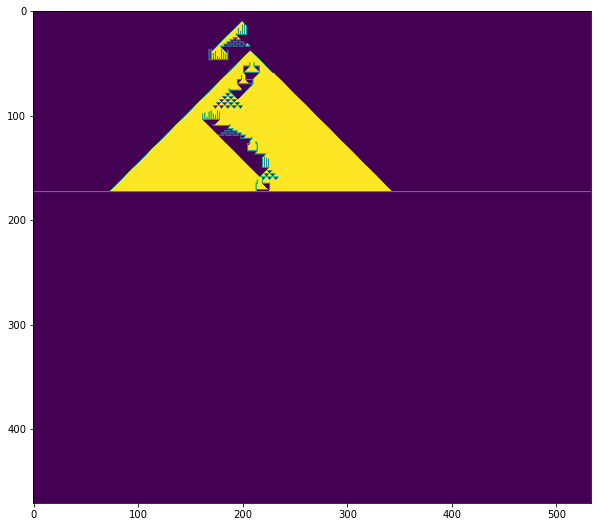

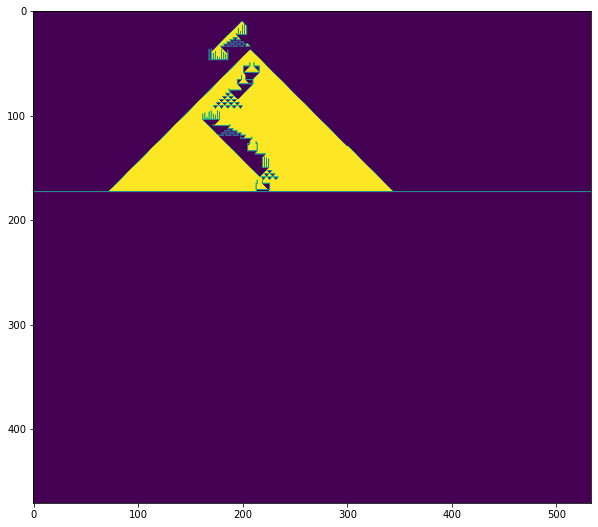

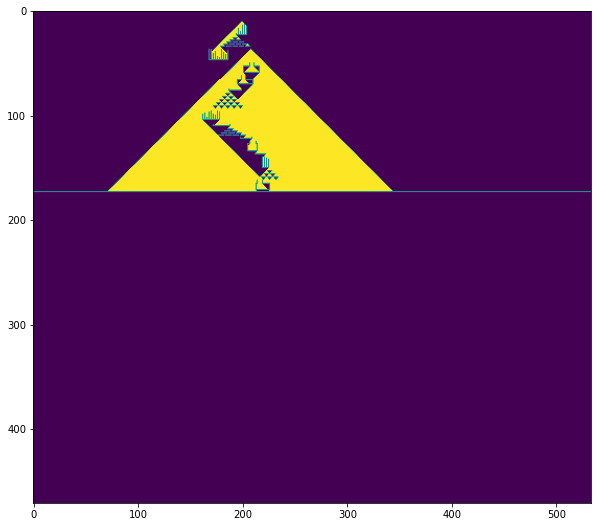

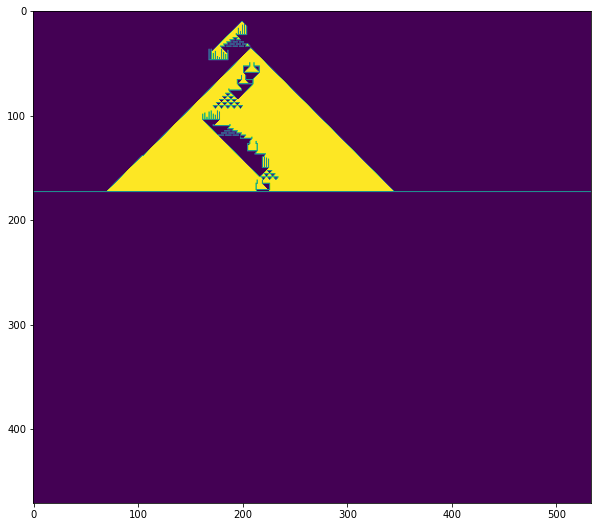

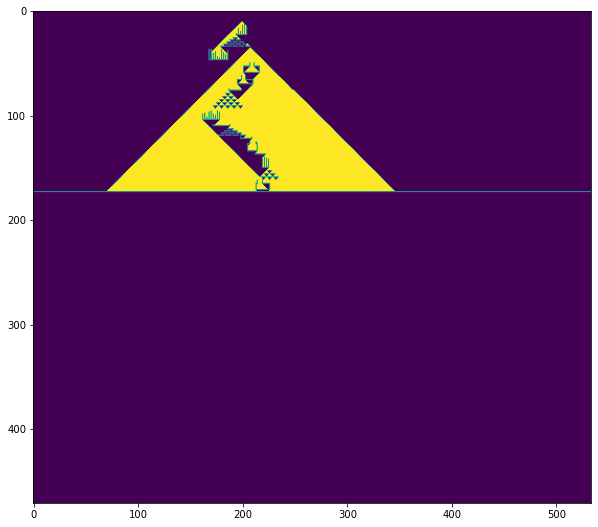

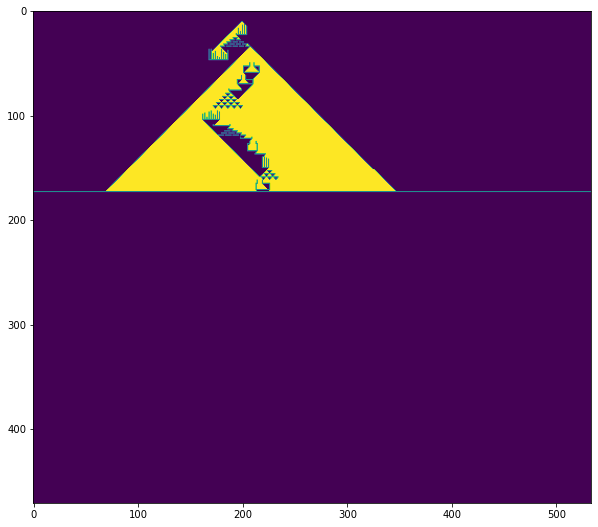

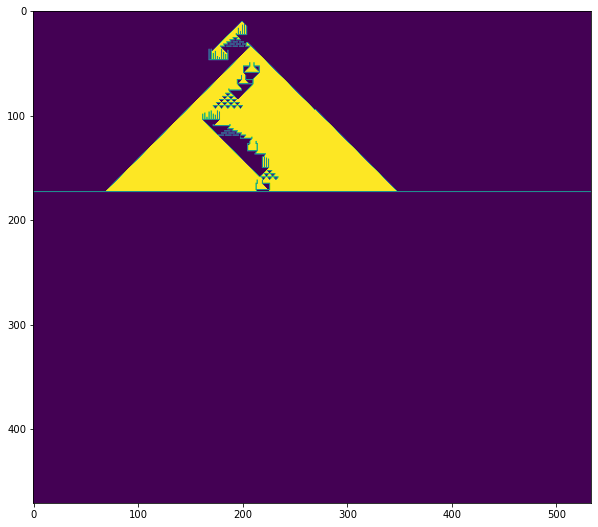

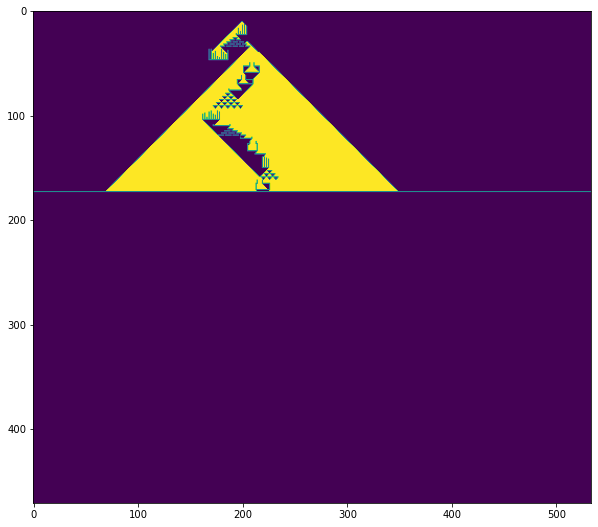

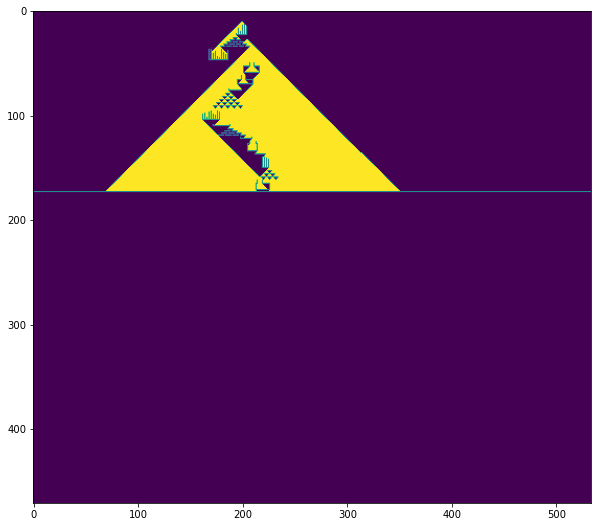

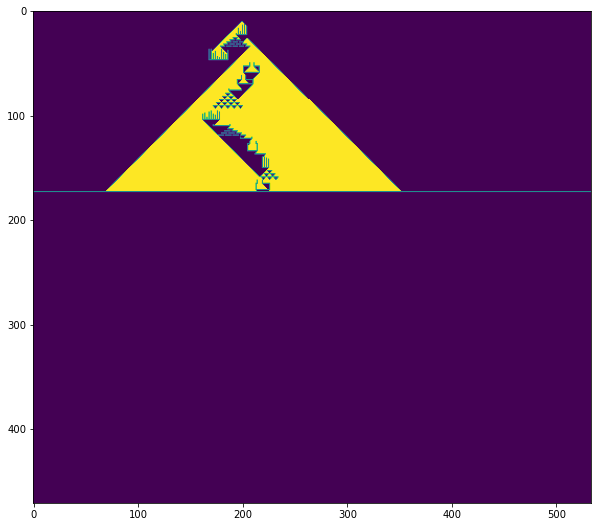

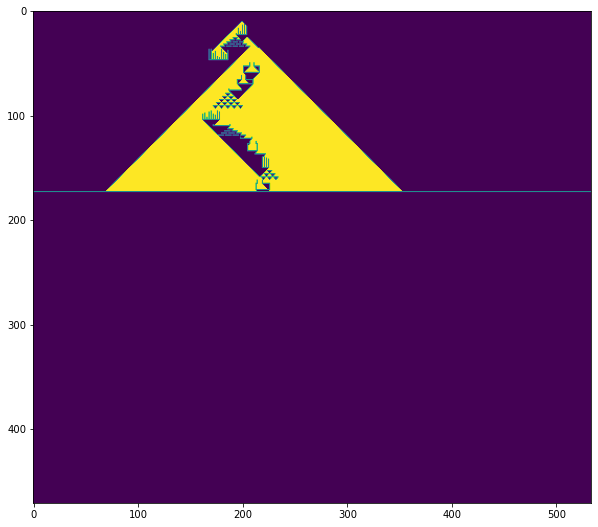

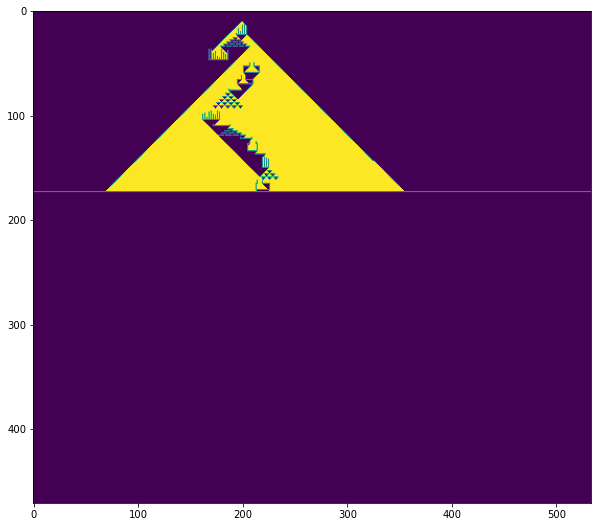

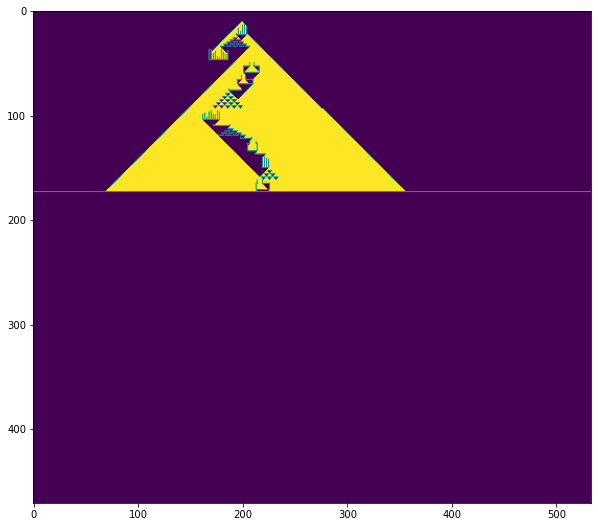

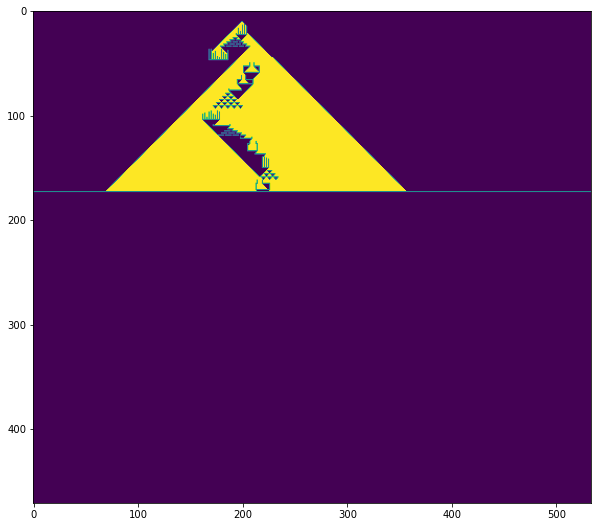

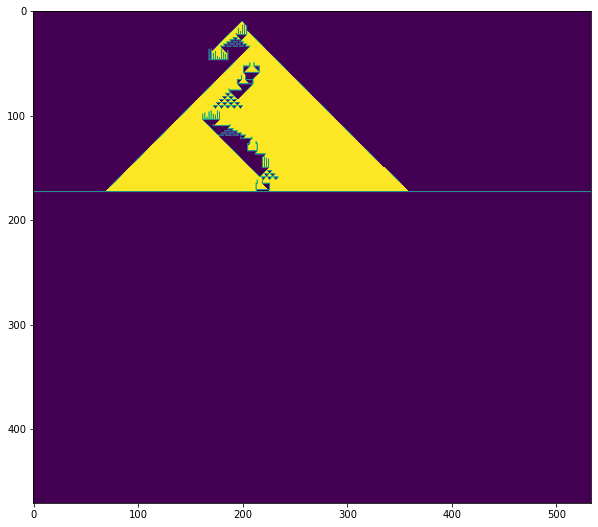

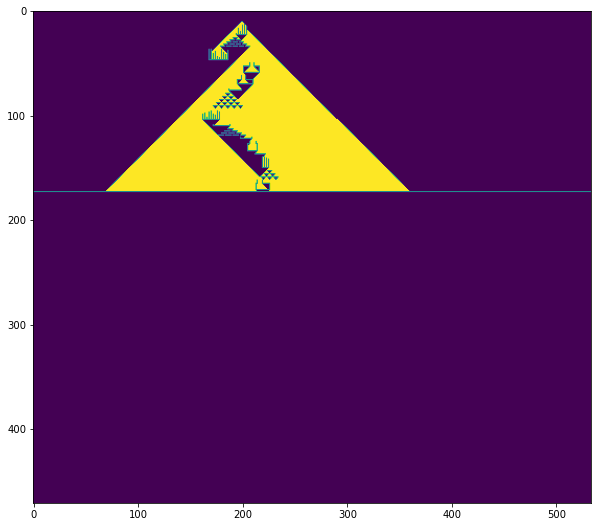

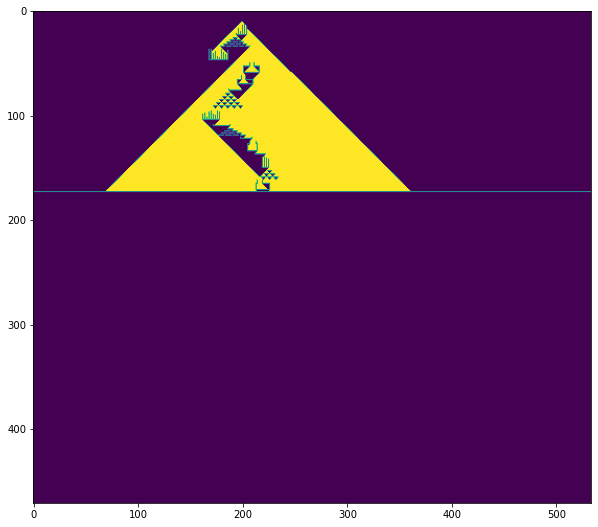

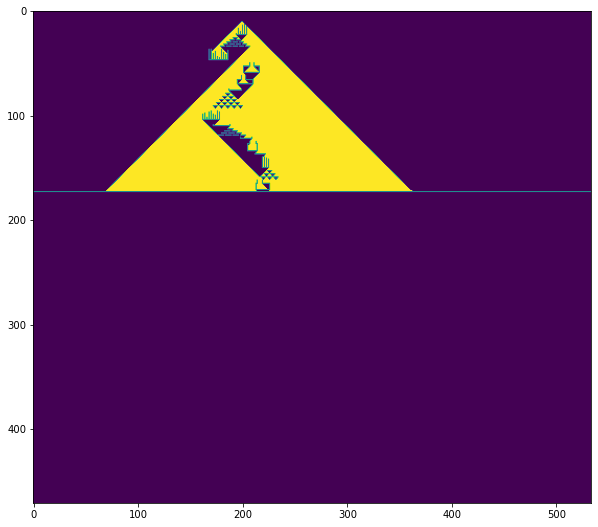

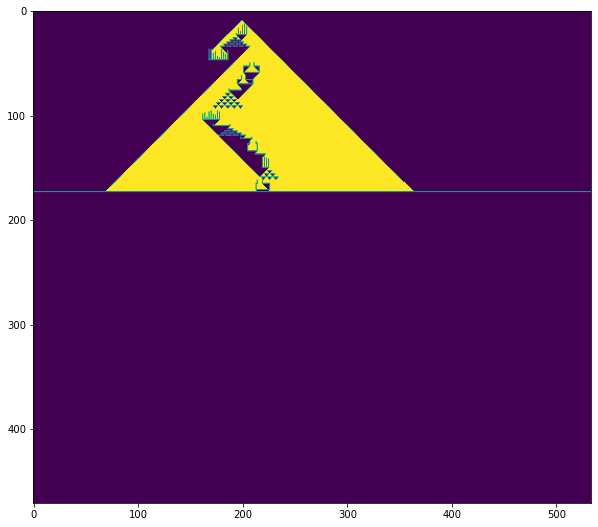

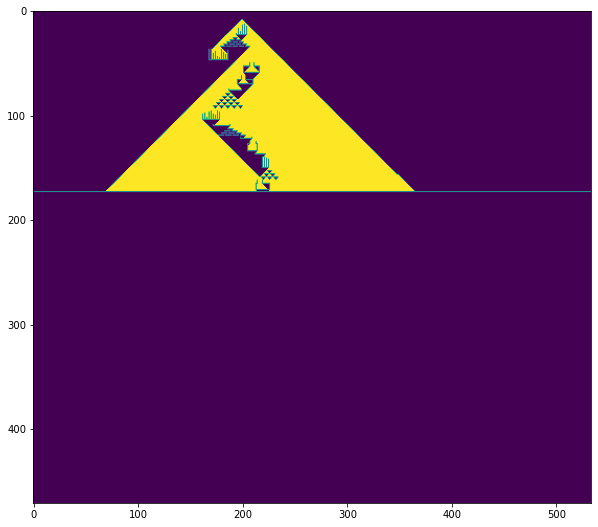

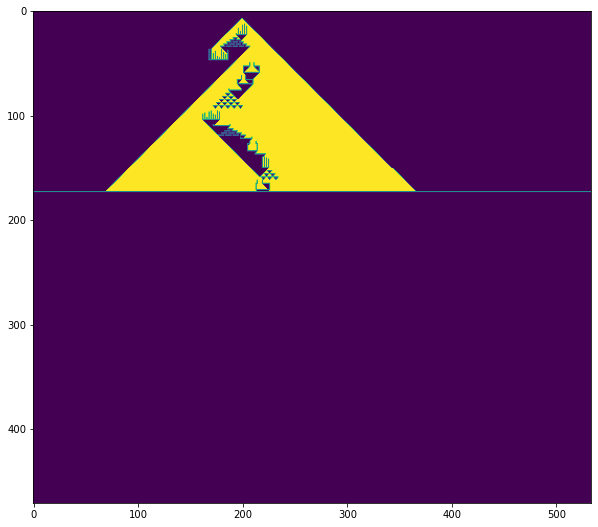

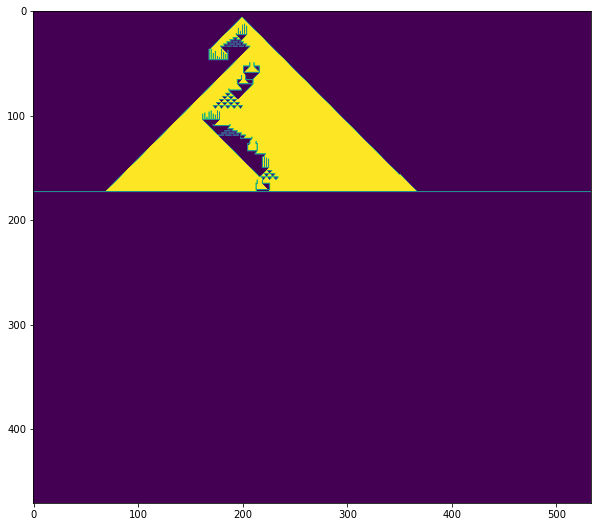

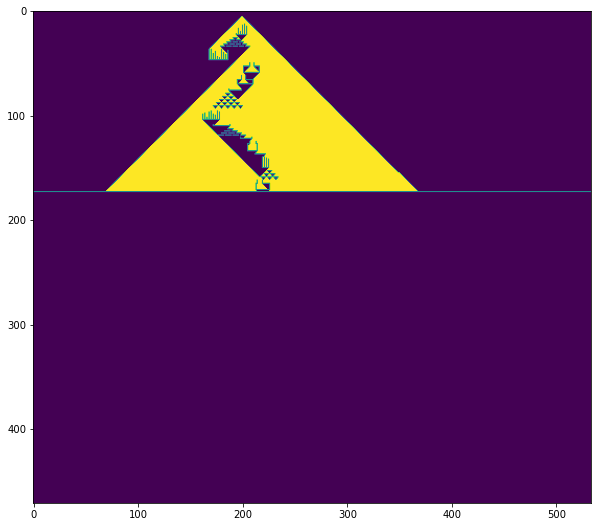

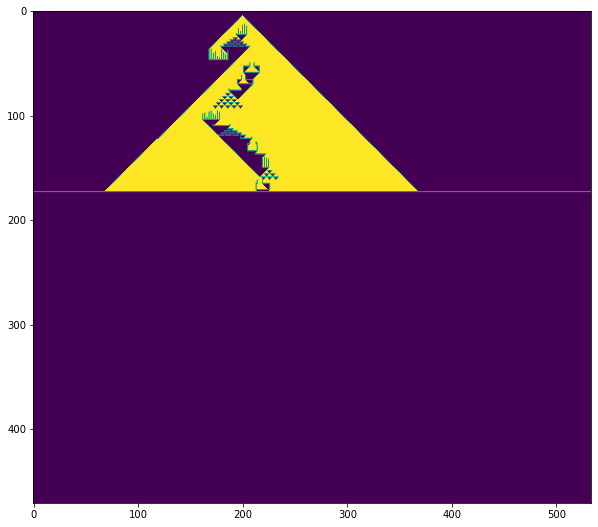

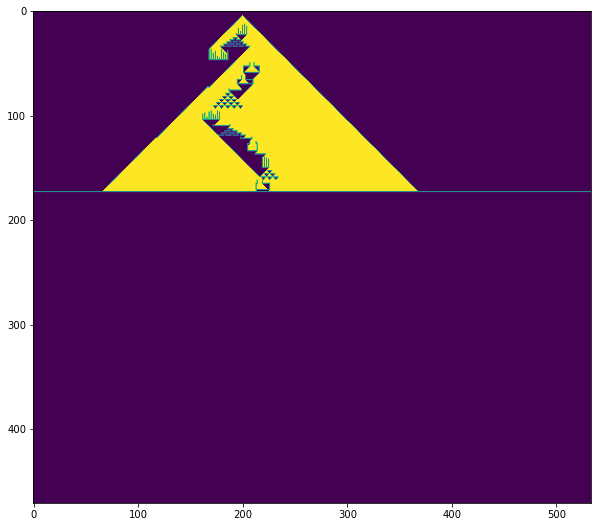

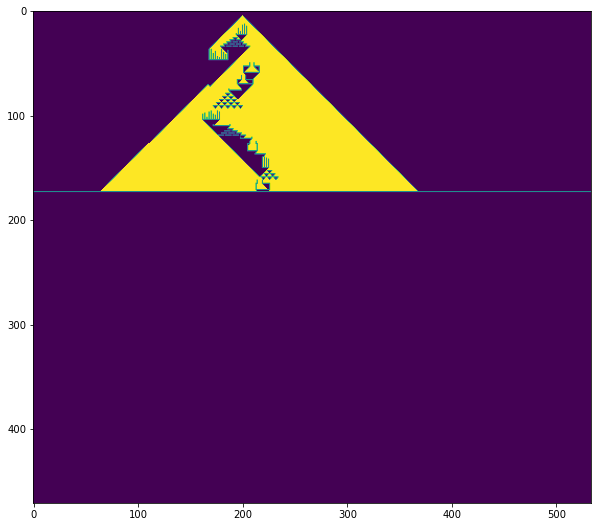

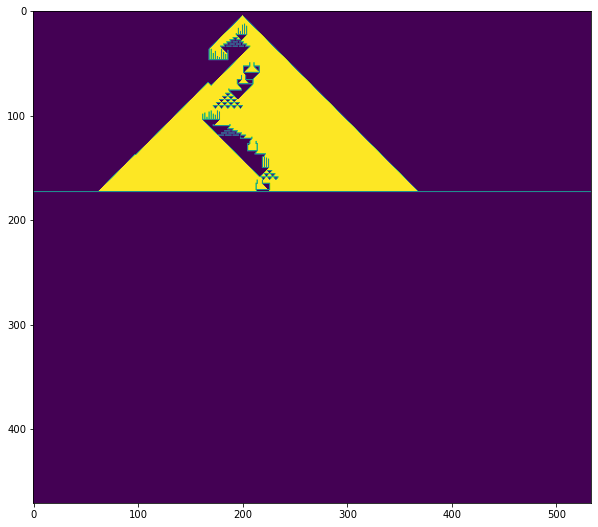

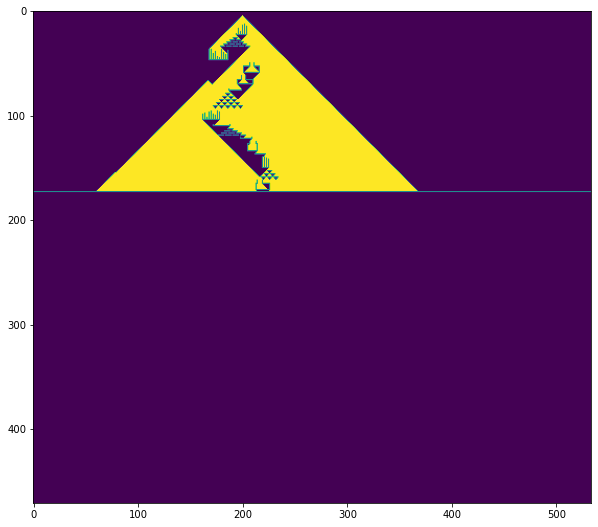

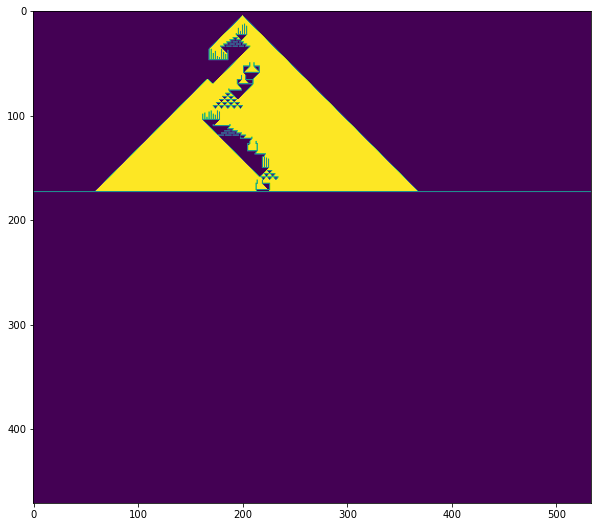

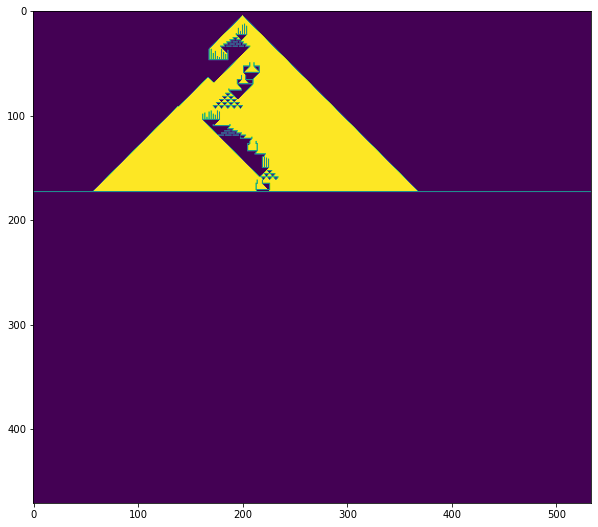

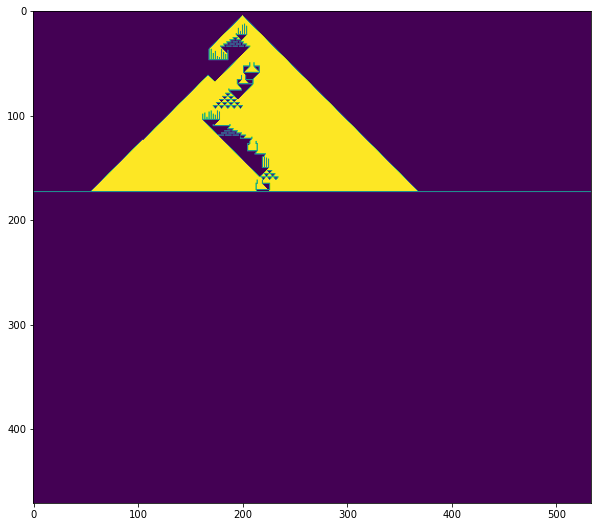

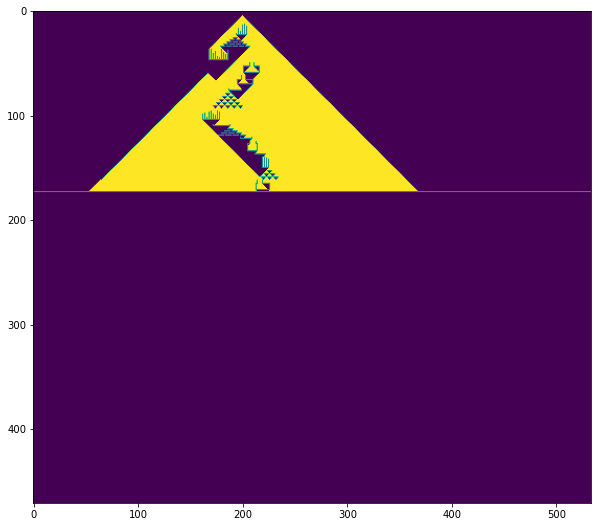

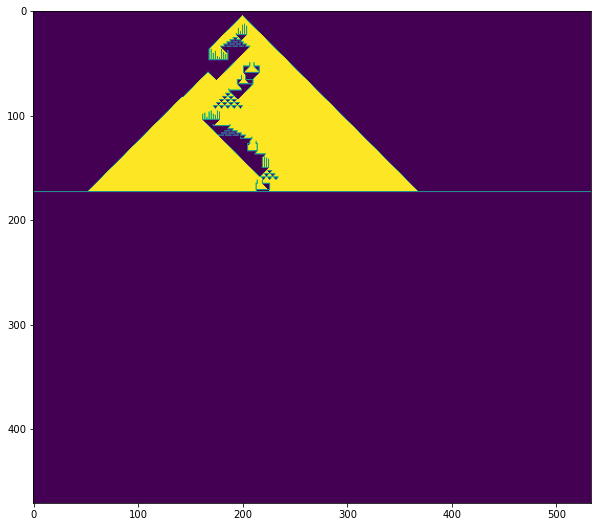

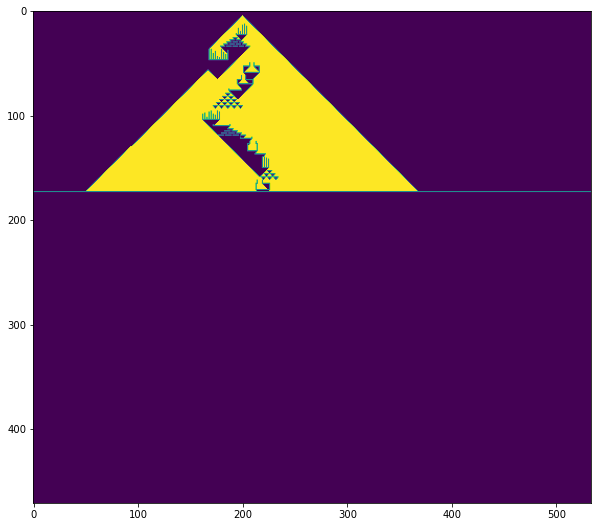

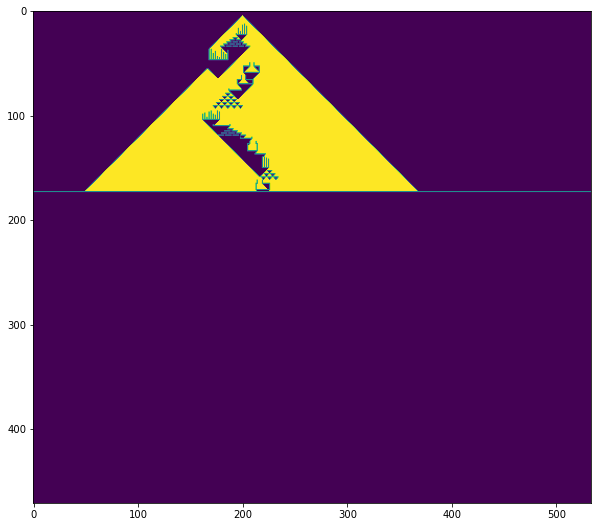

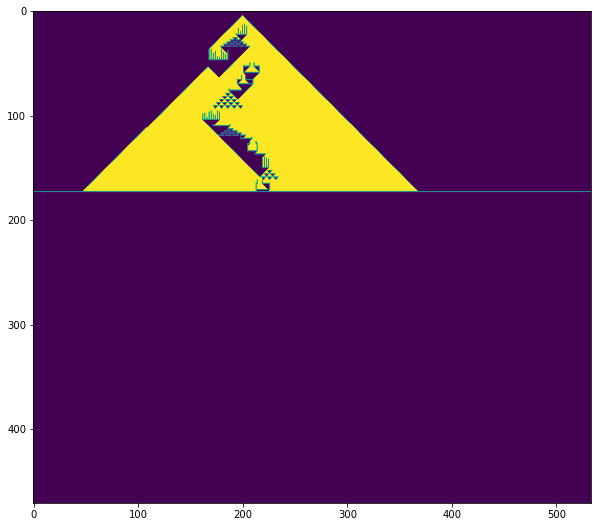

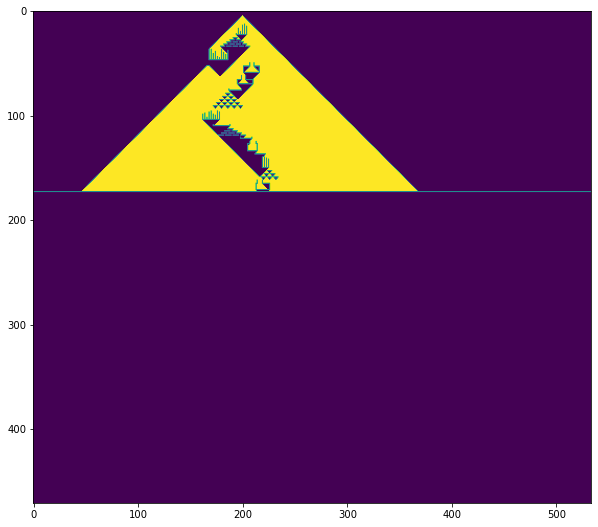

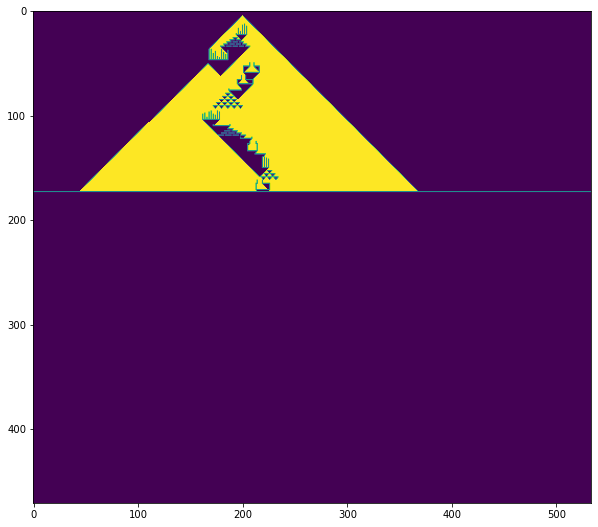

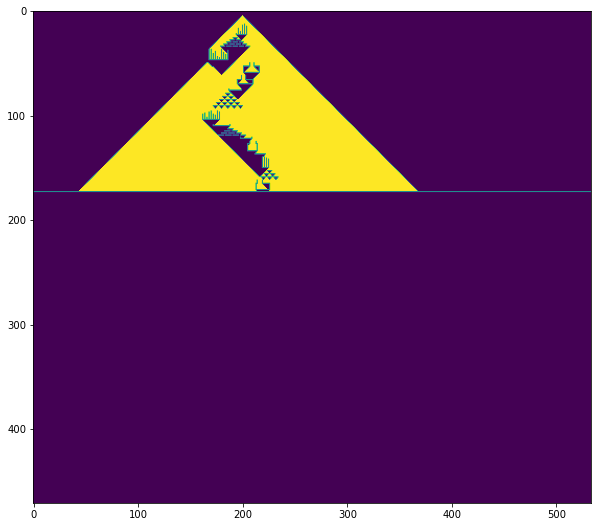

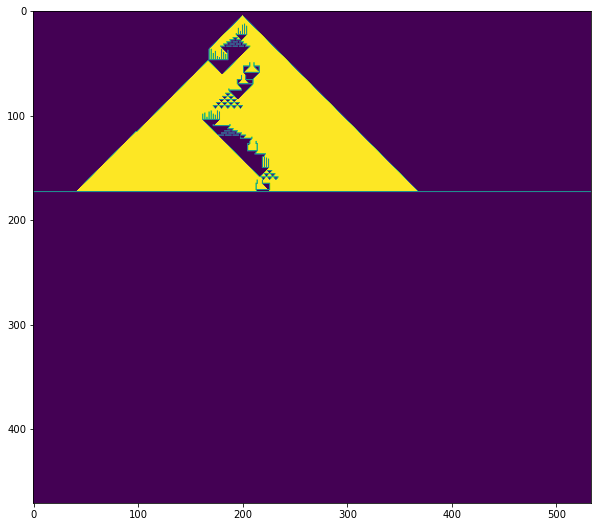

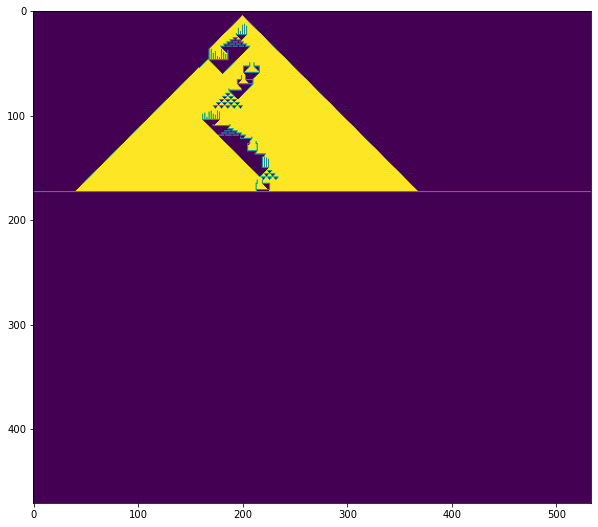

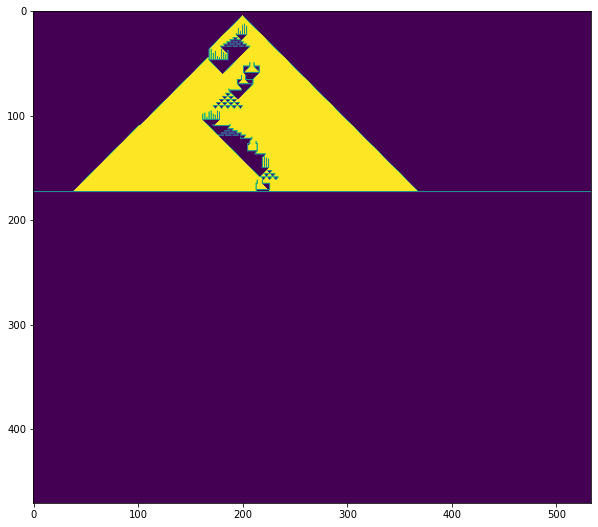

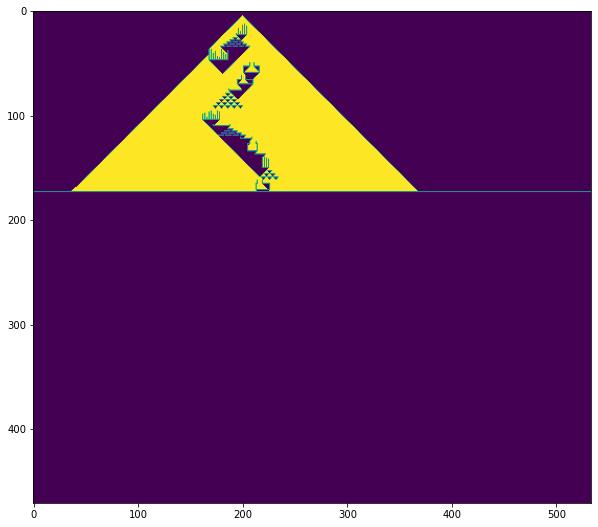

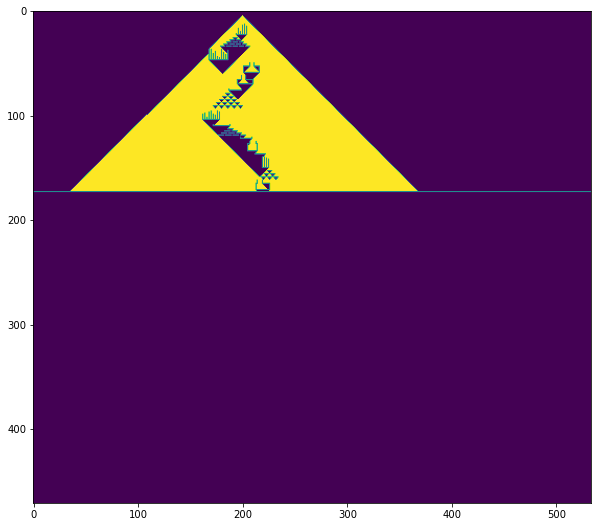

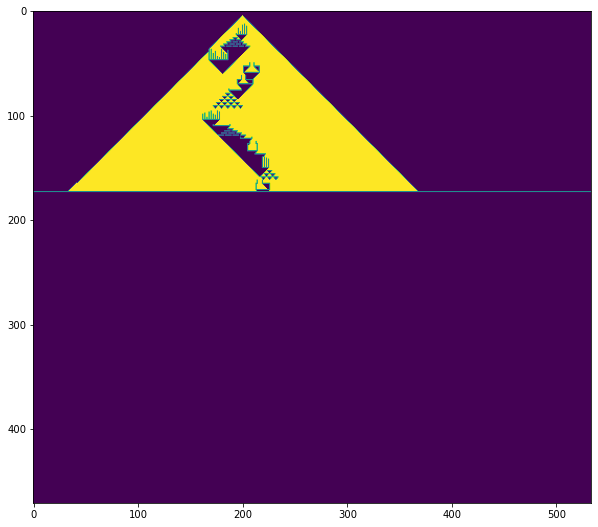

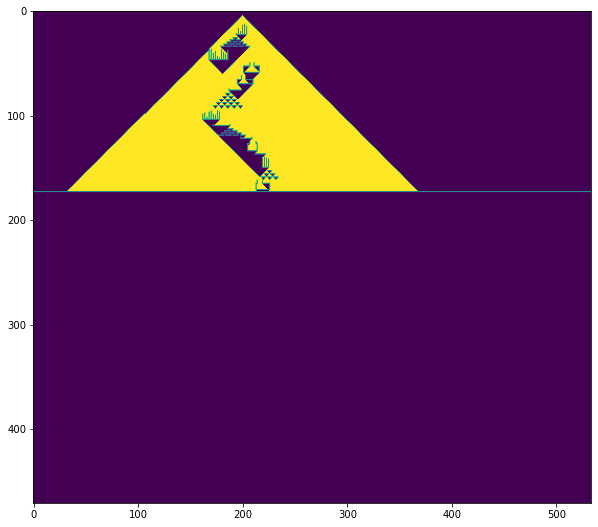

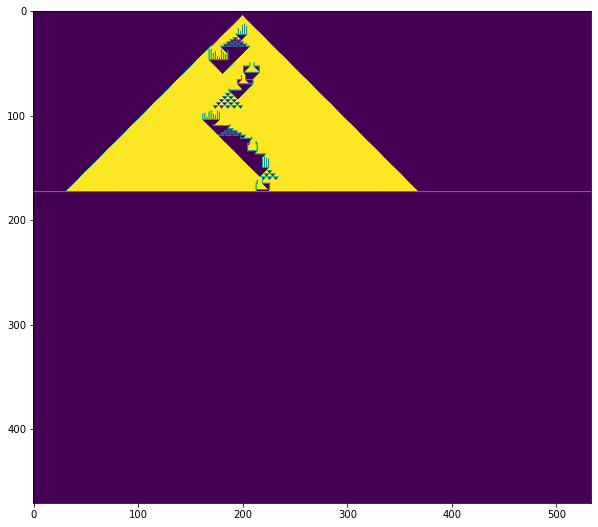

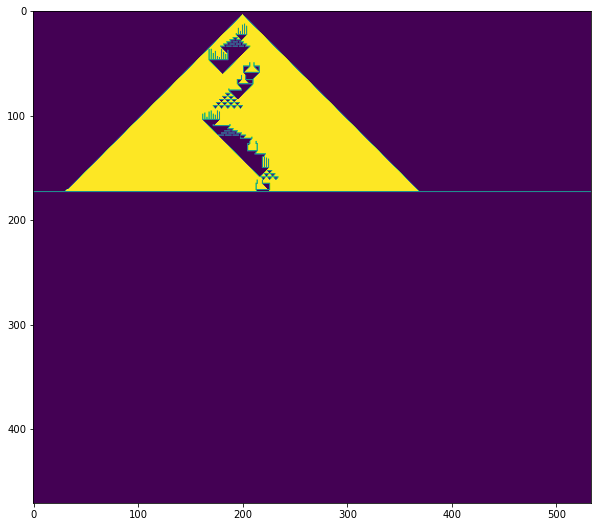

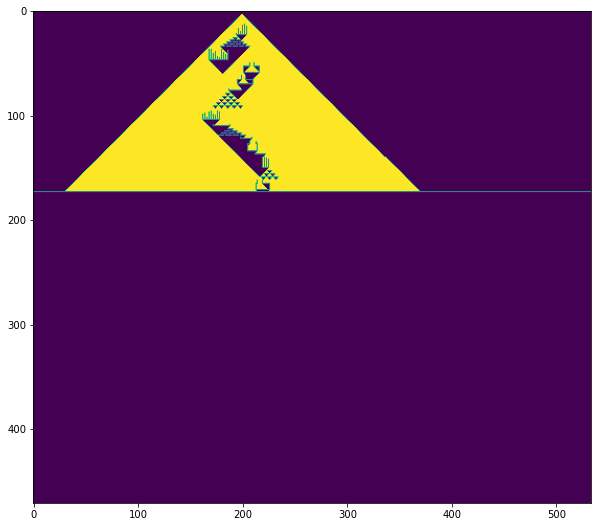

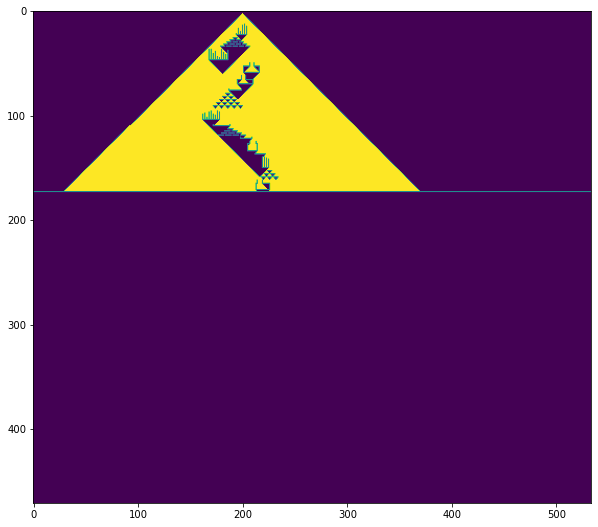

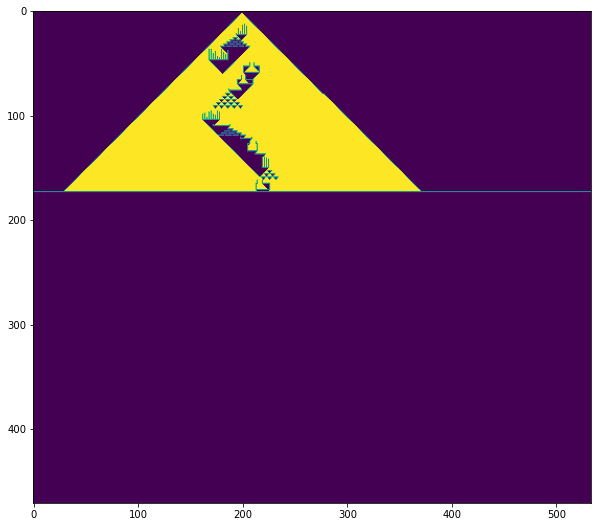

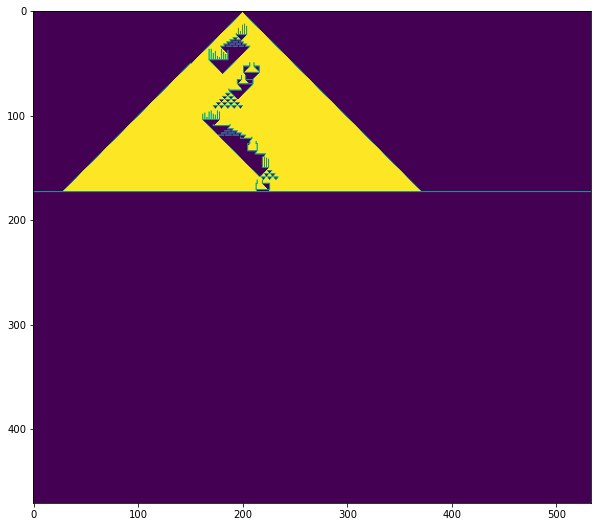

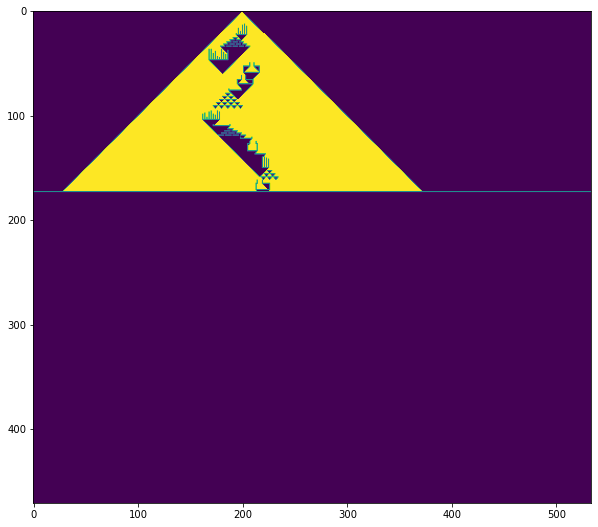

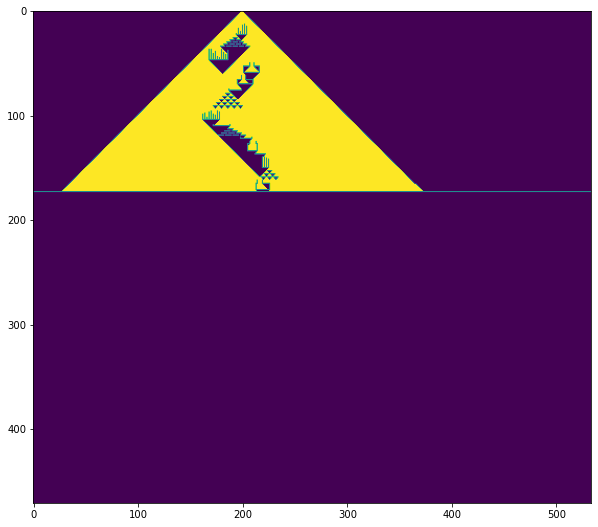

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
count =0
while True:
    count+=1
    pos = nextPosition(0,500)
    if pos == (0,500):
        break
    if type(pos) == tuple:
        x,y = pos
        m[x,y] =2
    else:
        break
    if count%200 == 0:
        plt.figure(figsize = (10,10))
        plt.imshow(m[:,300:]/2)
        plt.show()

m[:,493:]

In [24]:
(m[:,:] == 2).sum()+1

27566

In [182]:
len(m)

14

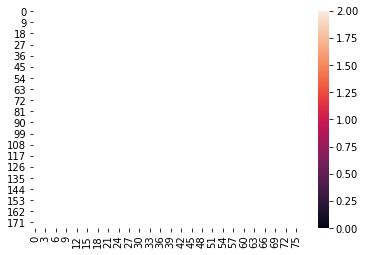

In [197]:

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(m[:,462:], linewidth=0.5)
plt.show()


In [211]:
(m==2).sum()

1133

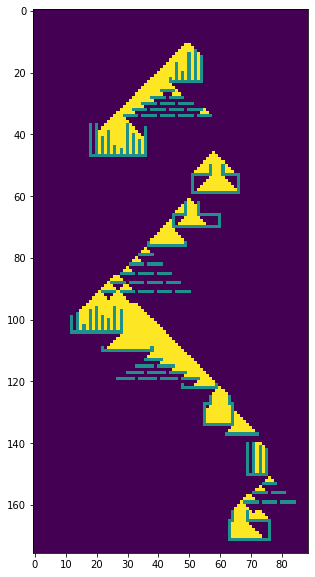

In [210]:
plt.figure(figsize = (10,10))
plt.imshow(m[:,450:]/2)